In [327]:
import warnings
warnings.filterwarnings('ignore')

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [329]:
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data inspection

In [330]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [331]:
#Checking for percentage of null values for checking the quality of dataset
pd.set_option('display.max_rows',200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### Columns with null values are around 47%, decreasing the quality of the dataset, so we drop those columns

In [332]:
#Now dropping columns with missing values greater than 47%
perc=47
threshold=int(((100-perc)/100)*app_data.shape[0] +1)
app_df = app_data.dropna(axis=1,thresh=threshold)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [333]:
#app_df.shape # =(307511, 73)

In [334]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [335]:
#Occupation type has 31% missing values
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100
#Changing them to 'others' values
app_df.OCCUPATION_TYPE.fillna('Others',inplace=True)

In [336]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [337]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100 #Now others occupy 31%

OCCUPATION_TYPE
Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

### EXT_SOURCE_3 has 19% missing columns

In [338]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.021492    0.000406
0.019468    0.000406
0.023062    0.000406
0.014556    0.000406
0.043227    0.000406
Name: proportion, Length: 814, dtype: float64

In [339]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

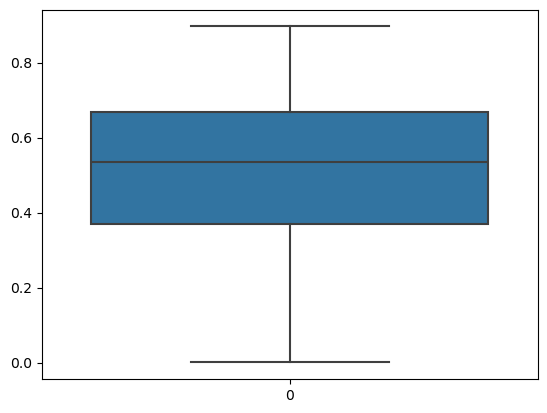

In [340]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

In [341]:
#This plot shaws there is not much difference between mean and median, hence we can impute with both
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

In [342]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.021492     0.000325
0.019468     0.000325
0.023062     0.000325
0.014556     0.000325
0.043227     0.000325
Name: proportion, Length: 814, dtype: float64

### Handling Missing values in columns with 13% null values

In [343]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64


• Conclusion: We couls see that 99% of values in the columns AMT_REQ_CREDIT BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT BUREAU_WEEK, AMT_REQ_CREDIT BUREAU_MON, AMT_REQ_CREDIT BUREAU_QRT,
AMT_REQ_CREDIT BUREAU_YEAR is 0.0. Hence impute these columns with the mode

In [344]:
Cols=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [345]:
for col in Cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace=True)

In [346]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


### Now Handling missing values for less than 1%

In [347]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [348]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [349]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

EXT_SOURCE_2
0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: proportion, Length: 119831, dtype: float64

In [350]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace=True)
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0],inplace=True)

In [351]:
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(),inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(),inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(),inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [352]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols) #Nice

0

In [353]:
#Converting -ve values to +ve in days variables so median is not affected
app_df.DAYS_BIRTH = app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH=app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION=app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))

### Days-->Years For easy binning

In [354]:
app_df['YEARS_BIRTH'] = app_df.DAYS_BIRTH.apply(lambda x: int(x//365))
app_df['YEARS_EMPLOYED'] = app_df.DAYS_EMPLOYED.apply(lambda x: int(x//365))
app_df['YEARS_REGISTRATION']=app_df.DAYS_REGISTRATION.apply(lambda x: int(x//365))
app_df['YEARS_ID_PUBLISH']=app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//365))
app_df['YEARS_LAST_PHONE_CHANGE']=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//365))

In [355]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [356]:
app_df['AMT_CREDIT_Category'] = pd.cut(app_df.AMT_CREDIT, [0, 200000, 400000, 600000, 800000, 1000000],
                                       labels=['Very low Credit', 'Low Credit', 'Medium Credit', 'High Credit', 'Very High Credit'])

In [357]:
app_df.AMT_CREDIT_Category.value_counts(normalize=True)*100

AMT_CREDIT_Category
Low Credit          31.511770
Medium Credit       25.733324
High Credit         16.791314
Very low Credit     14.035088
Very High Credit    11.928504
Name: proportion, dtype: float64

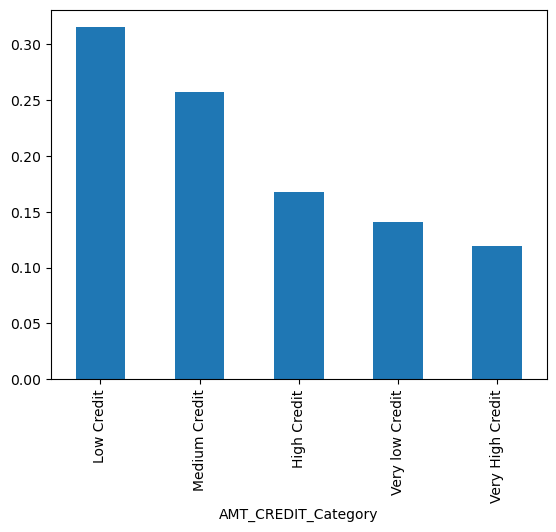

In [358]:
app_df['AMT_CREDIT_Category'].value_counts(normalize=True).plot.bar()
plt.show()

In [359]:
app_df['AGE_Category'] = pd.cut(app_df.YEARS_BIRTH,[0,25,45,65,85],
                                labels=['Below 25','25-45','45-85','65-85'])

In [360]:
app_df.AGE_Category.value_counts(normalize=True)*100

AGE_Category
25-45       51.901233
45-85       41.163406
Below 25     5.306477
65-85        1.628885
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

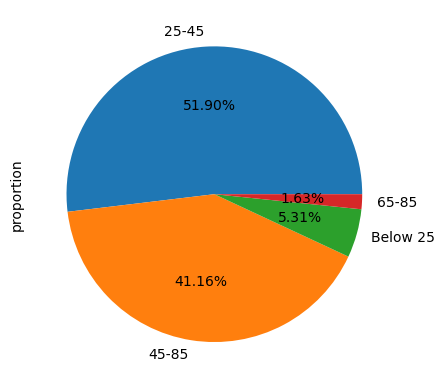

In [361]:
app_df['AGE_Category'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')

Conclusion>> Most applicants are 25-25 Age group

In [362]:
#Checking Data Imbalance
tar_0=app_df[app_df.TARGET==0]
tar_1=app_df[app_df.TARGET==1]

In [363]:
app_df.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

### This means that every 1 out of (approximately) 9 applicants are defaults

## Unvariate Analysis

In [364]:
cat_cols = list(app_df.columns[app_df.dtypes == np.object_])
num_cols = list(app_df.columns[(app_df.dtypes == np.int64) | (app_df.dtypes == np.float64)])

In [365]:
#cat_cols

In [366]:
#num_cols

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


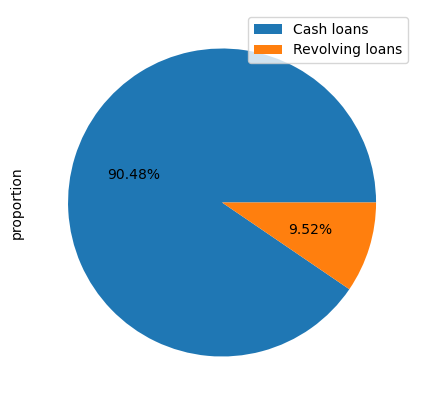

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


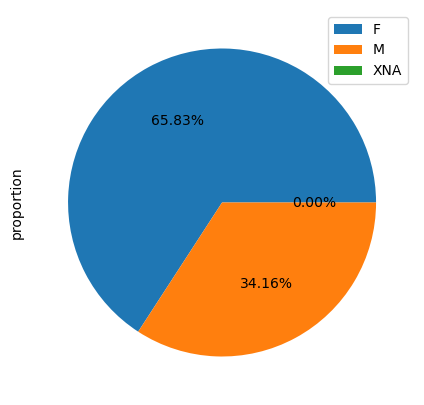

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


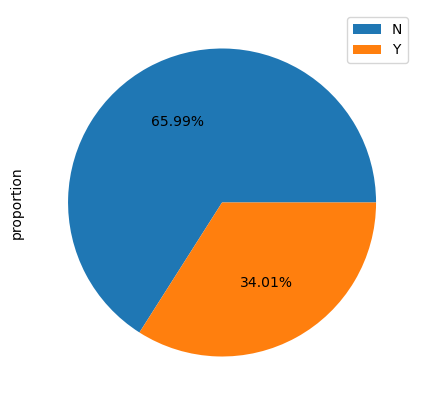

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


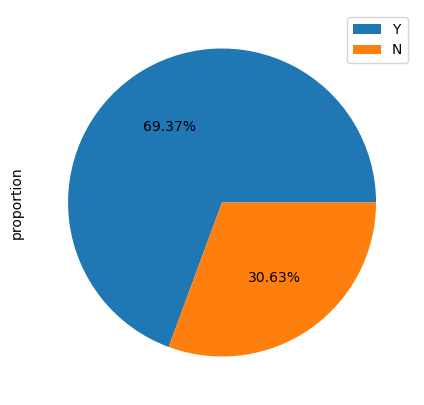

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


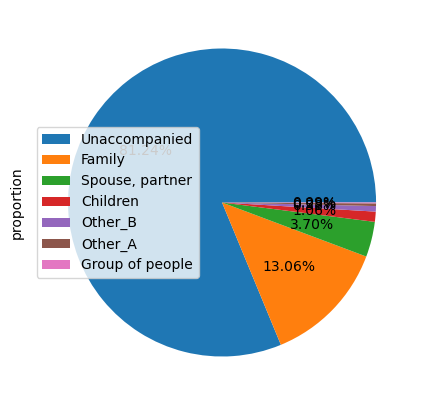

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


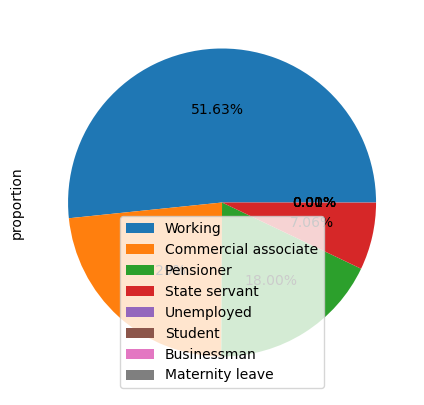

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


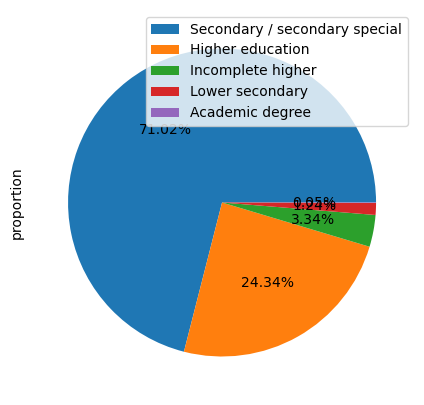

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


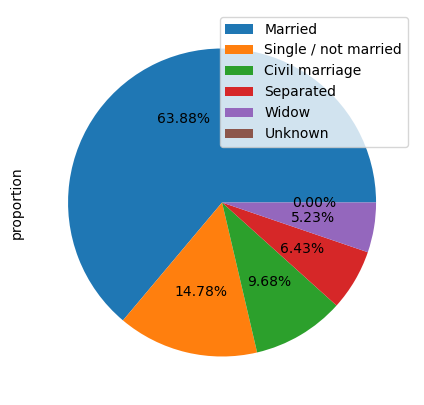

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


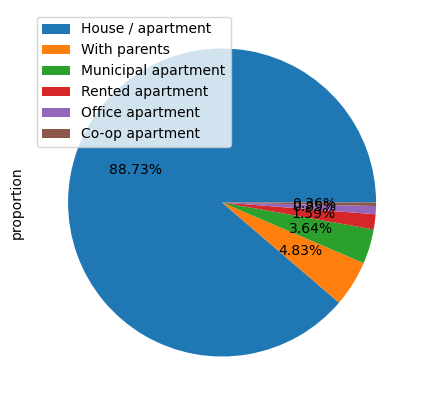

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


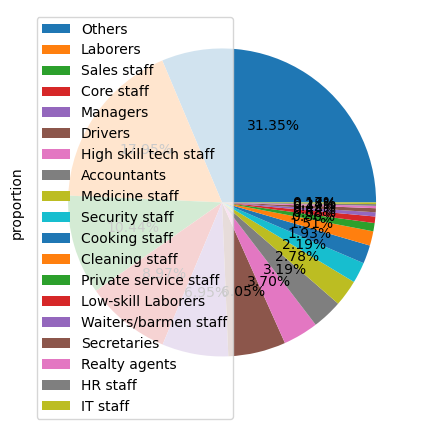

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


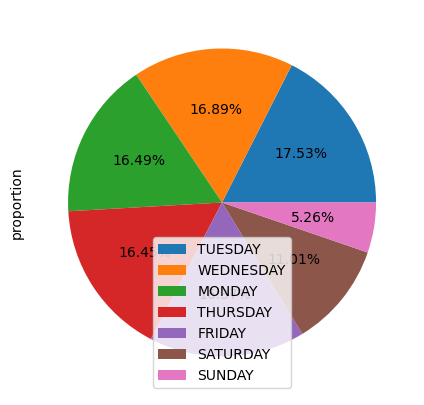

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

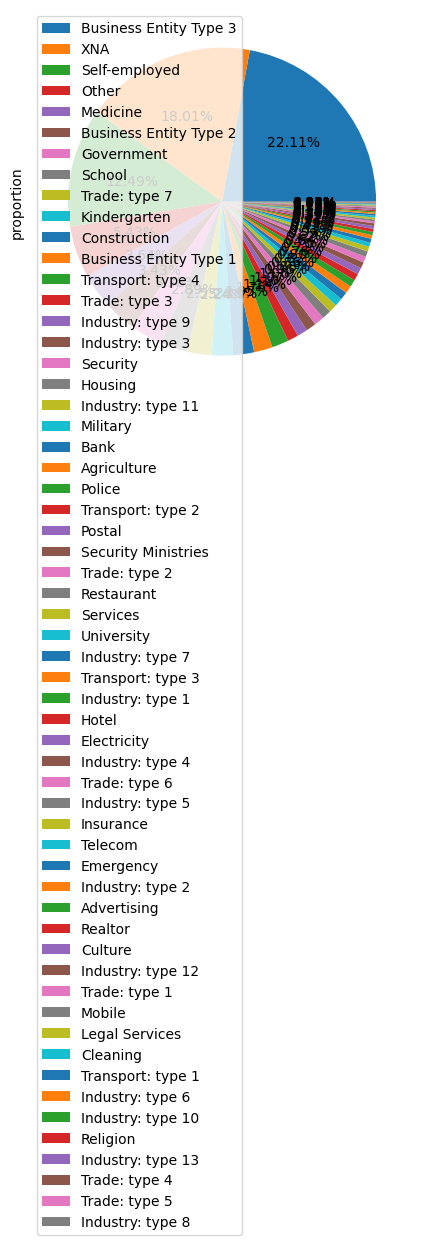

In [367]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
    plt.legend()
    plt.show()
    #The plot with all possible details


• Conclusion >> Insights on below columns
1. NAME_CONTRACT_TYPE - More application have Cash loans than Revolving loans
2. CODE_GENDER - Number of Female applicants are twice than that of male applicants
3. FLAG_OWN_CAR - Most (70%) of the applicants do not own a car
4. FLAG_OWN_REALTY - Most (70%) of the applicants do not own a house
5. NAME_TYPE_SUITE - Most (81%) of the applicants are Unaccompanied
6.NAME_INCOME_TYPE - Most (51%) of the applicants are earning their income from Work
7. NAME_EDUCATION_TYPE - 71% of the applicants have completed Secondary/secondary special education
8. NAME_FAMILY_STATUS - 63% of the applicants are married
9. NAME HOUSING_TYPE - 88% of the housing type of applicants are House/apartment
10. OCCUPATION_TYPE - Most(31%) of the applicants have other Occupation type
11. WEEKDAY_APPR_PROCESS_START- Most of the applicant have applied the loan on Tuseday
12. ORGANIZATION_TYPE - Most of the Organization type of employees are Business Entity Type 3

In [368]:
num_cols_withoutflag=[]
num_cols_withflag=[]
for col in num_cols:
    if col.startswith('FLAG'):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [369]:
#num_cols_withflag

In [370]:
#num_cols_withoutflag   #All right

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


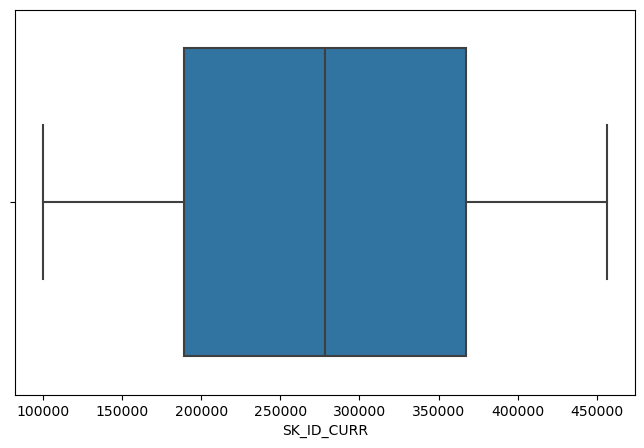

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


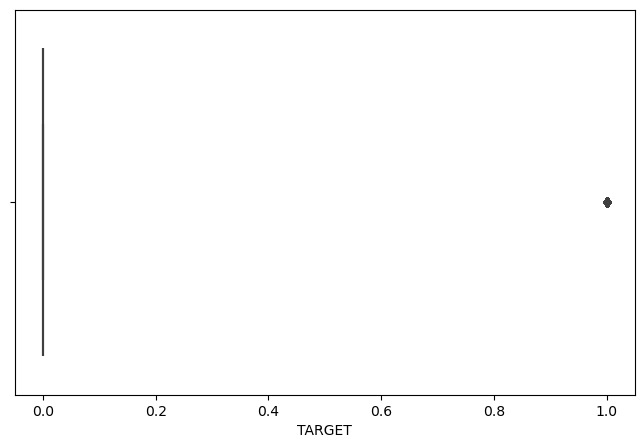

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


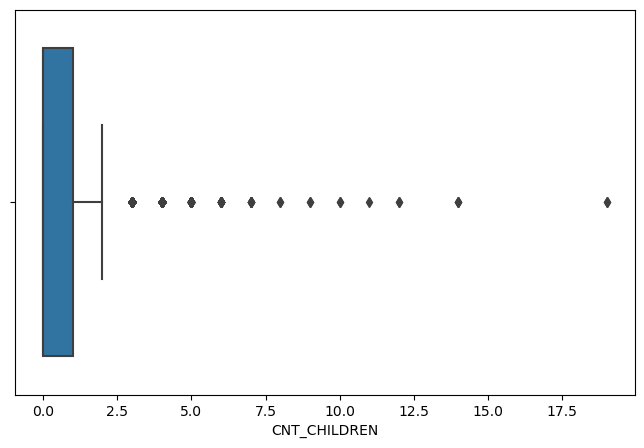

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


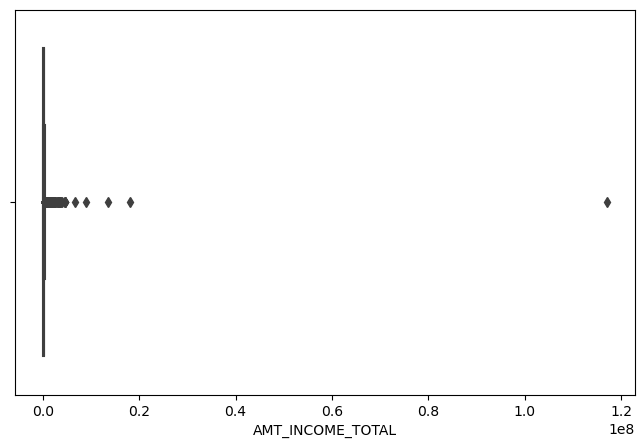

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


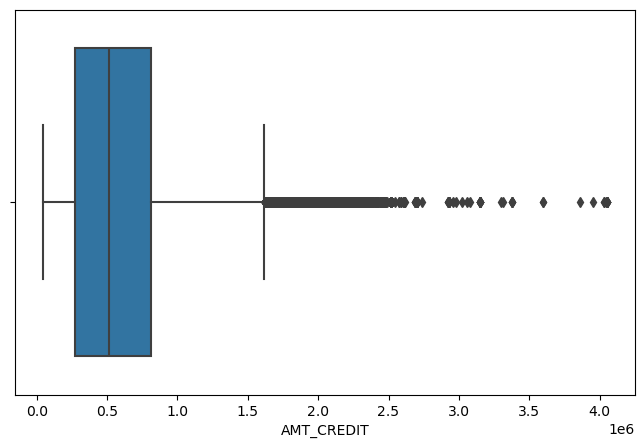

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


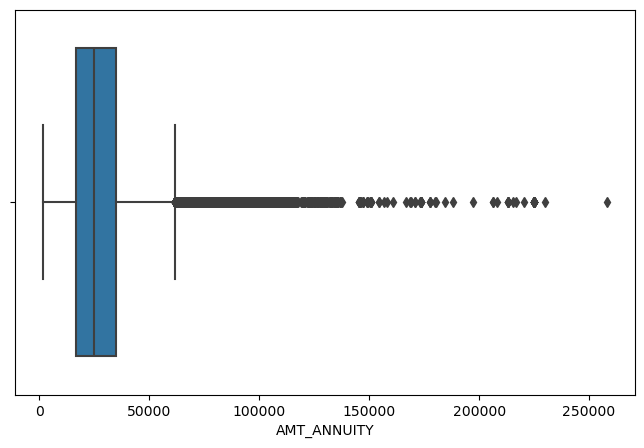

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


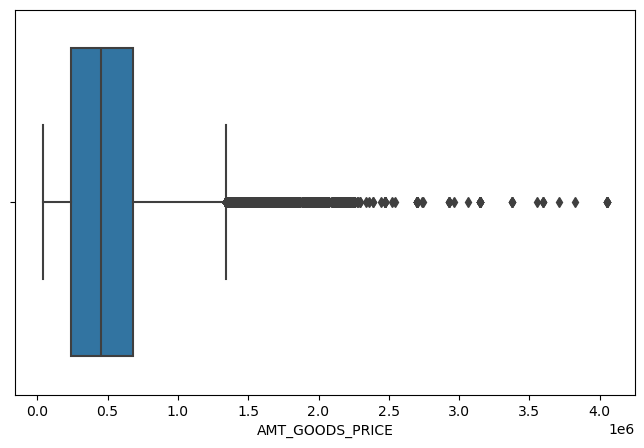

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


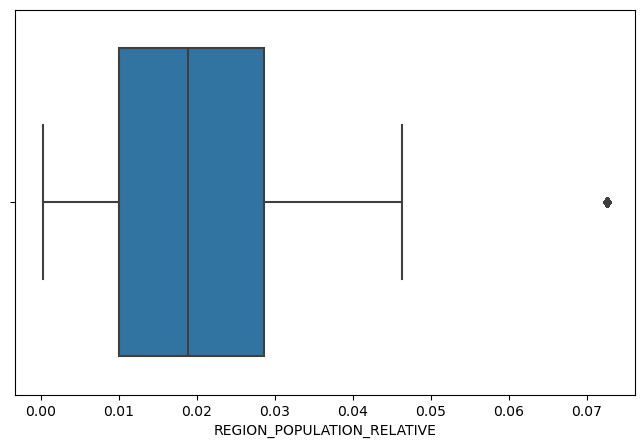

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


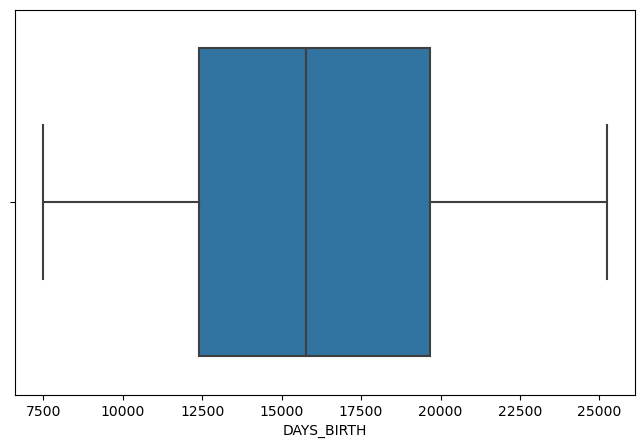

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


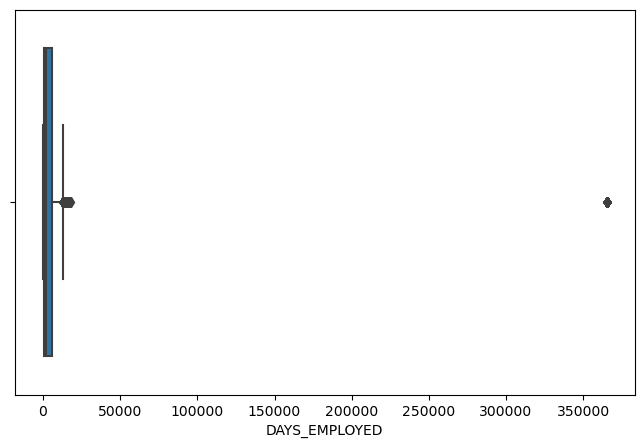

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


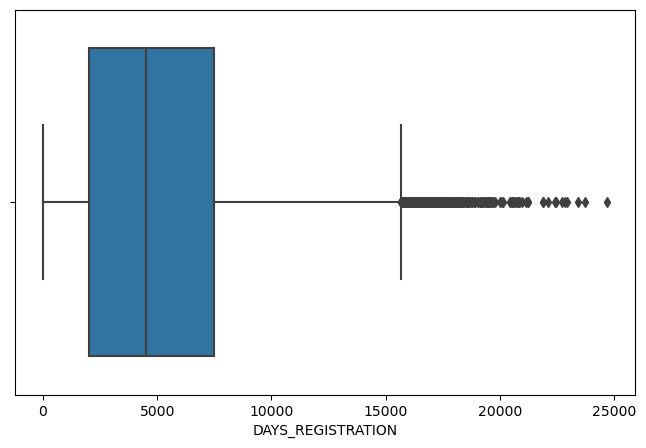

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


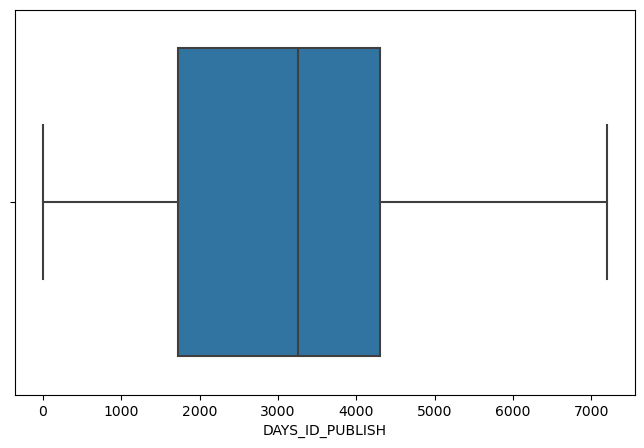

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


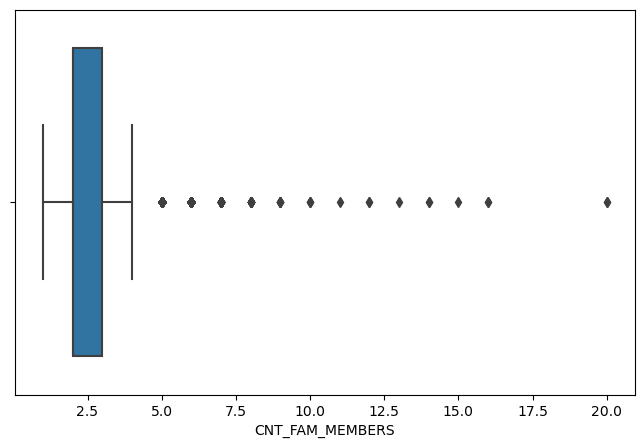

count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


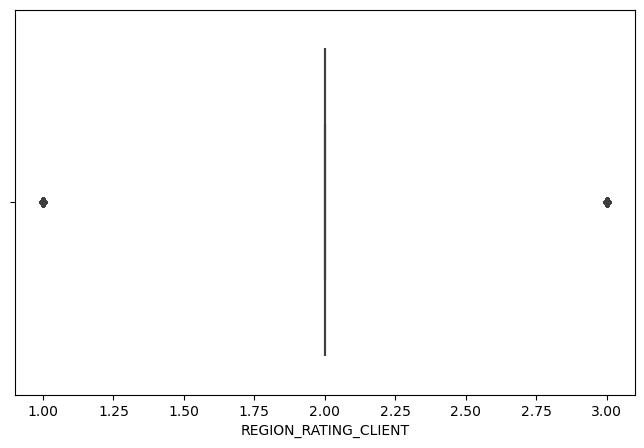

count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


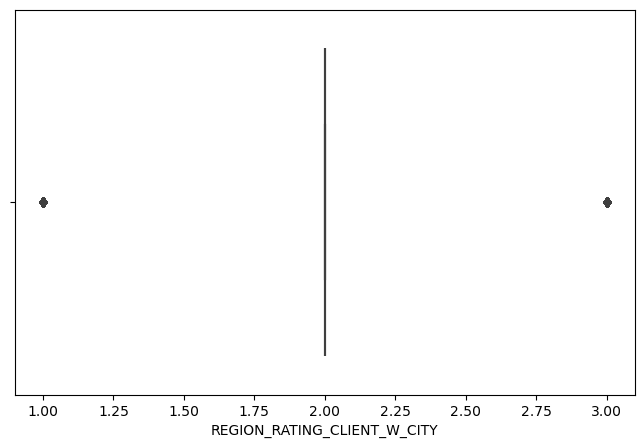

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


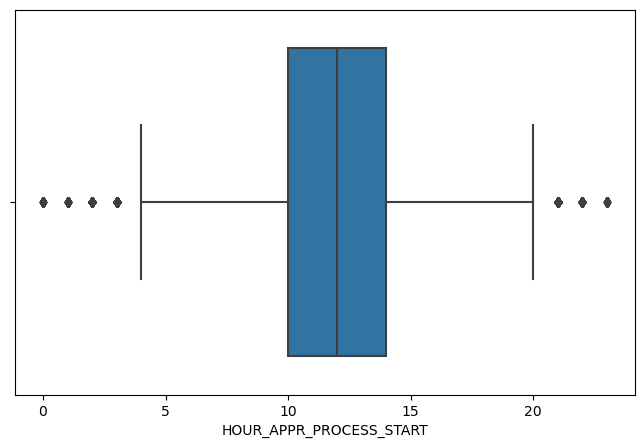

count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


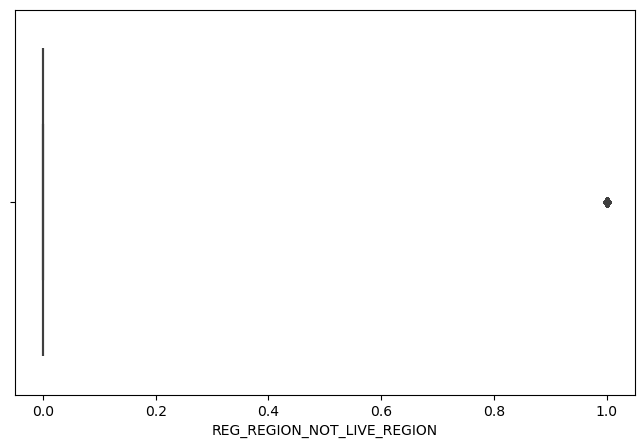

count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


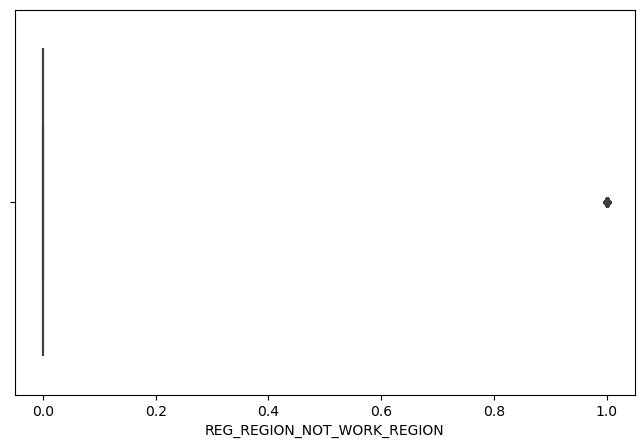

count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


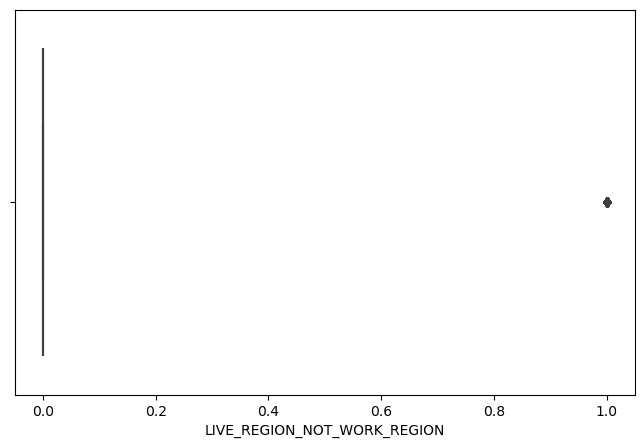

count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


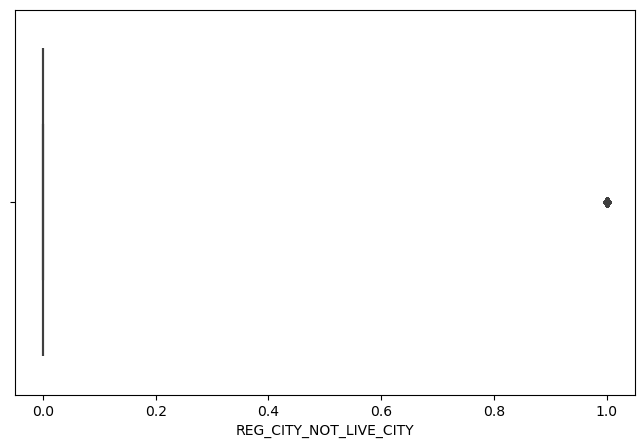

count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


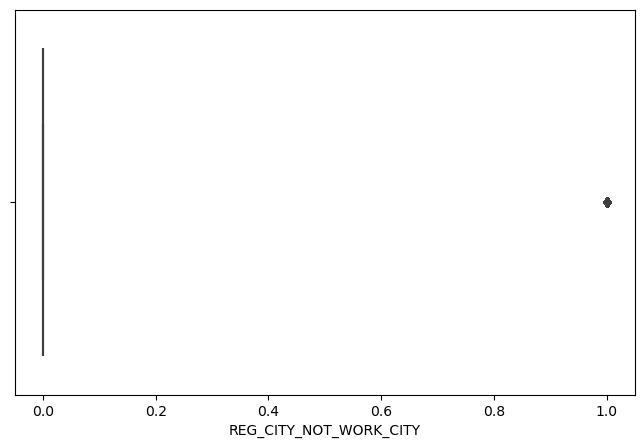

count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


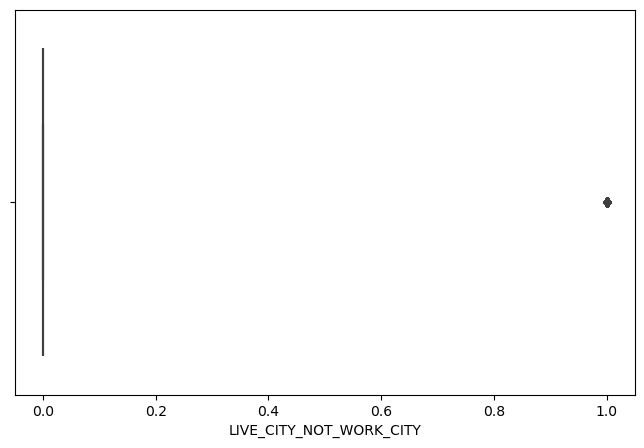

count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


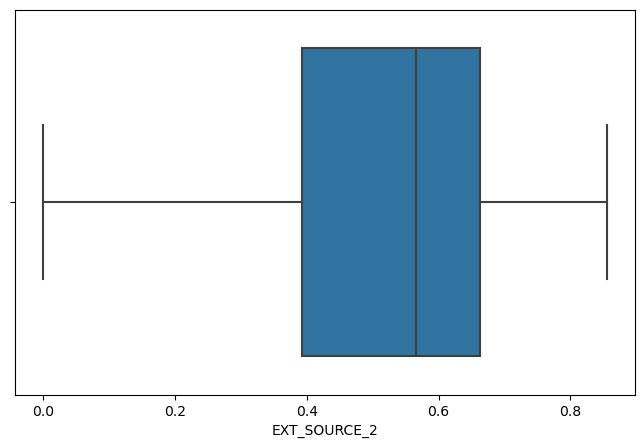

count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


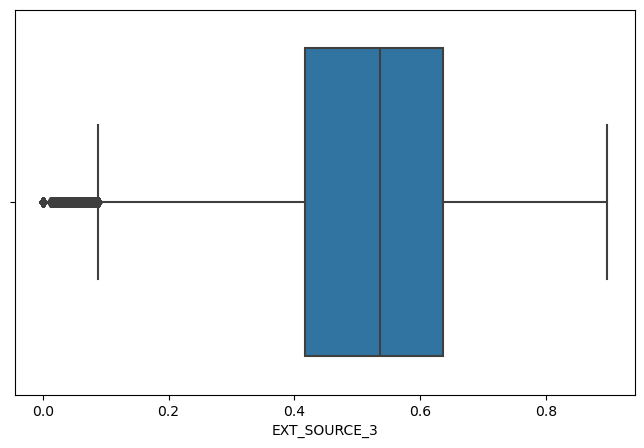

count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


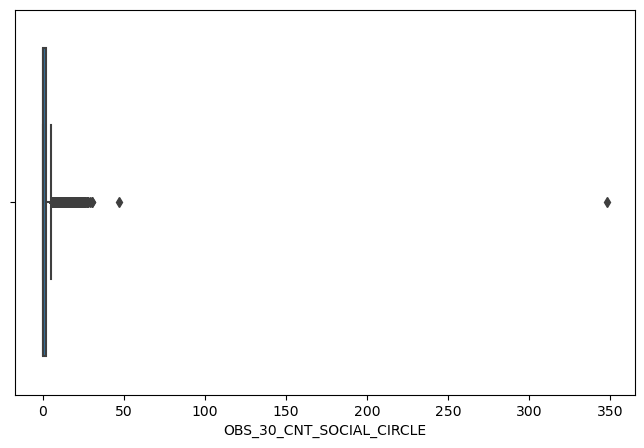

count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


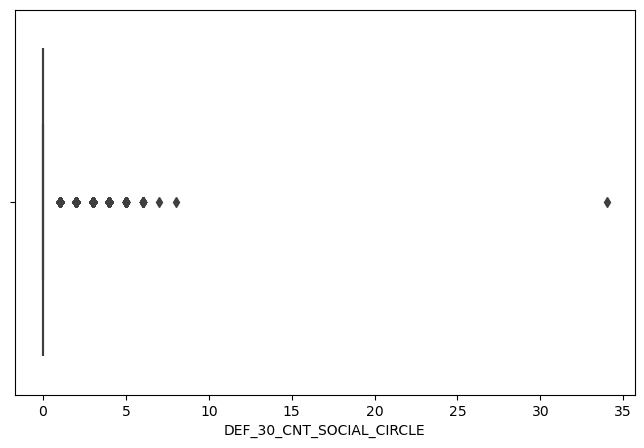

count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


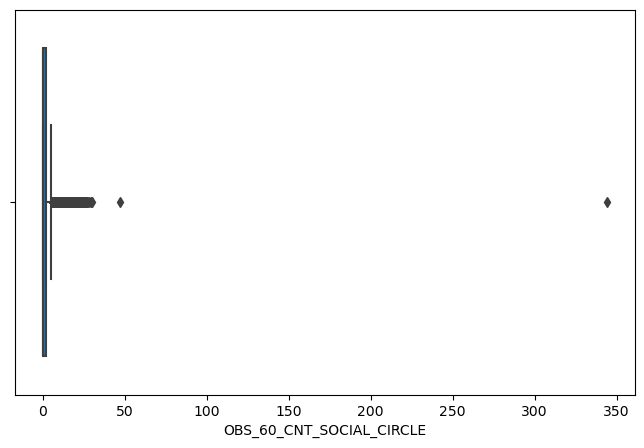

count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


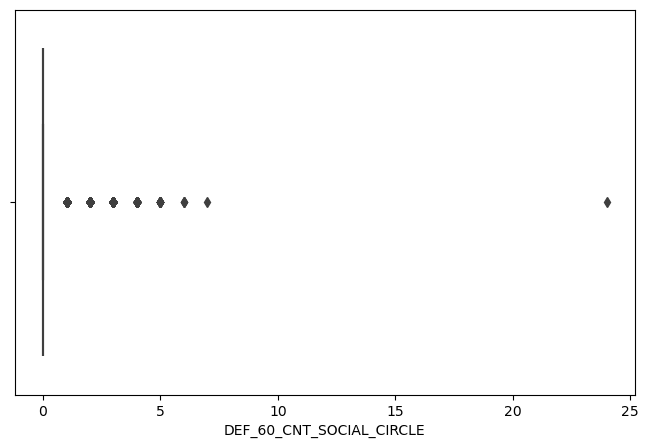

count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


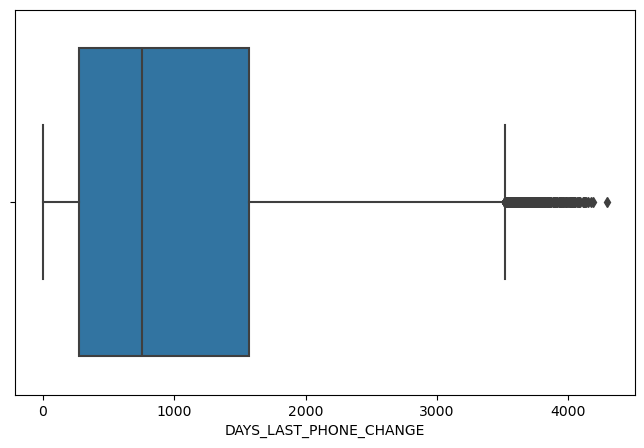

count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


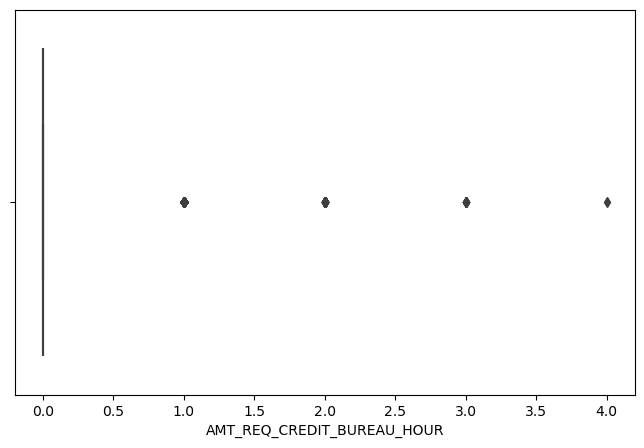

count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


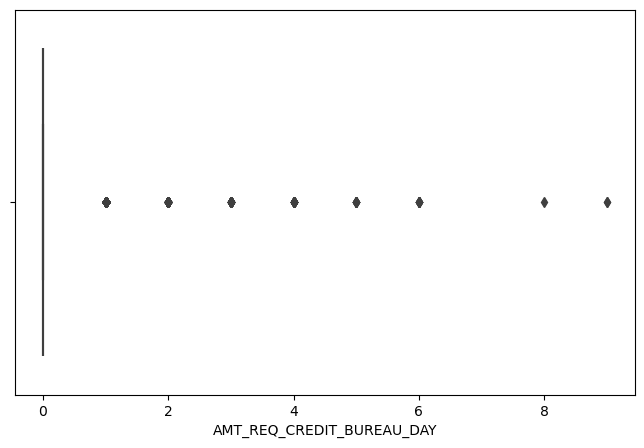

count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


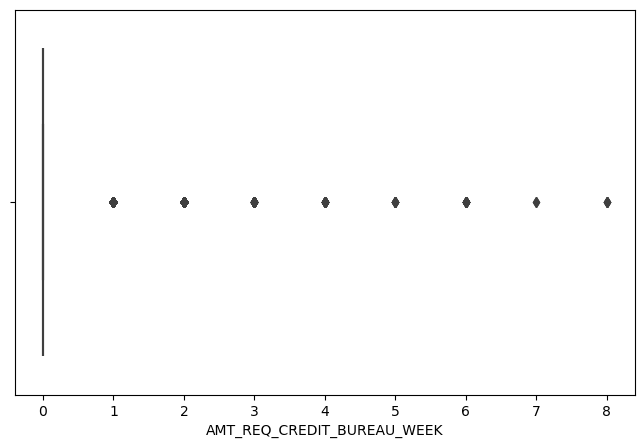

count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


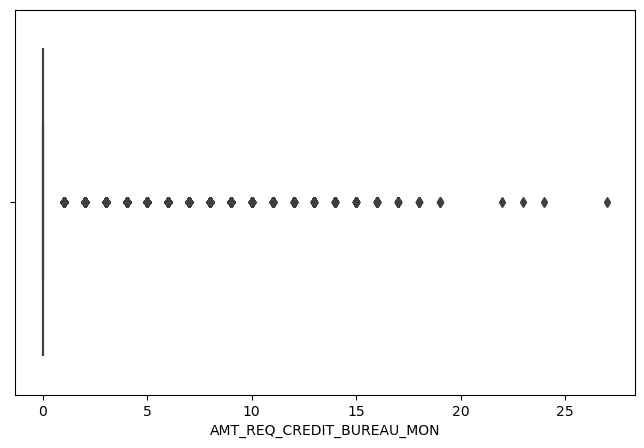

count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


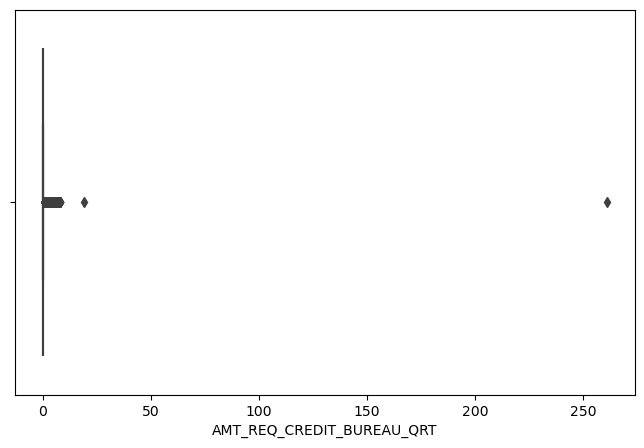

count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


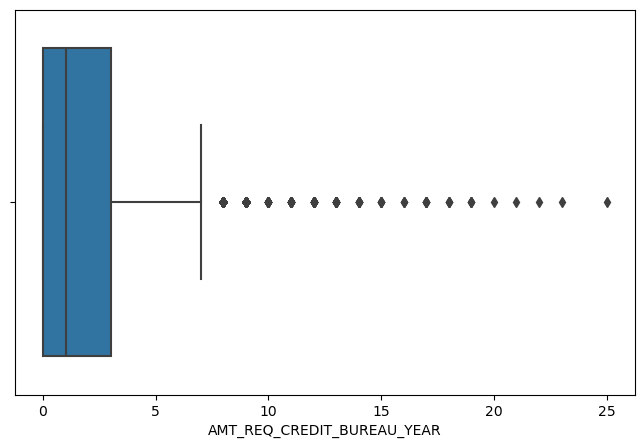

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


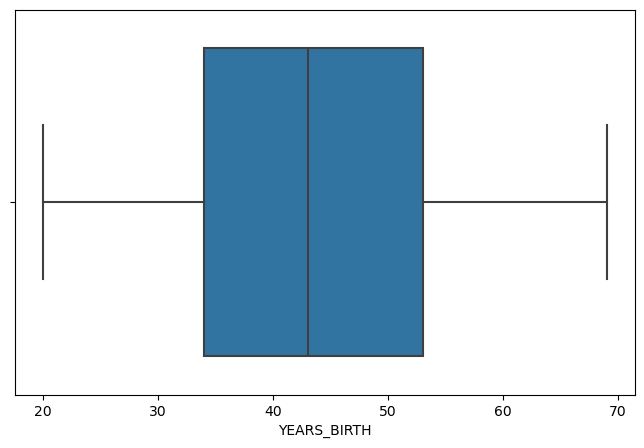

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


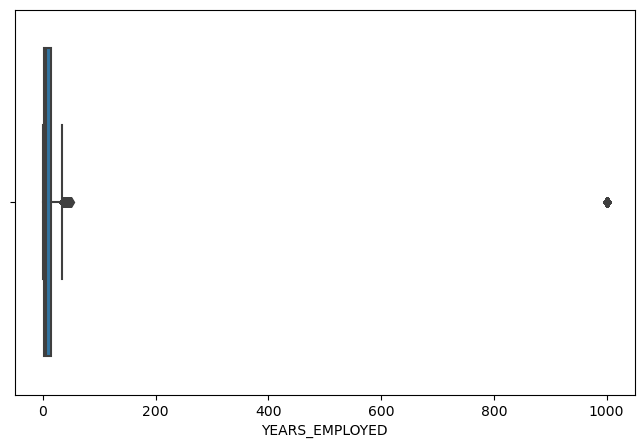

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


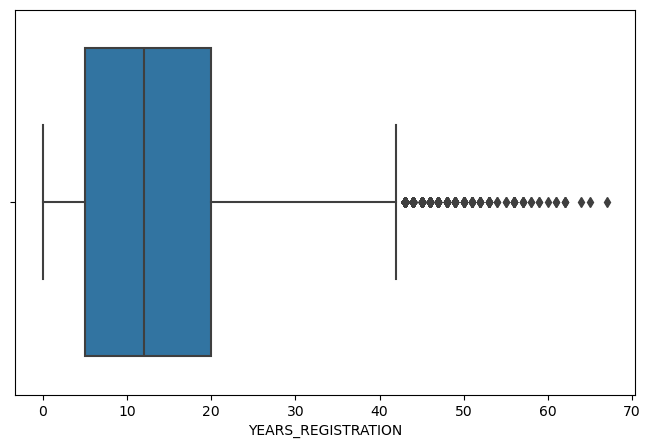

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


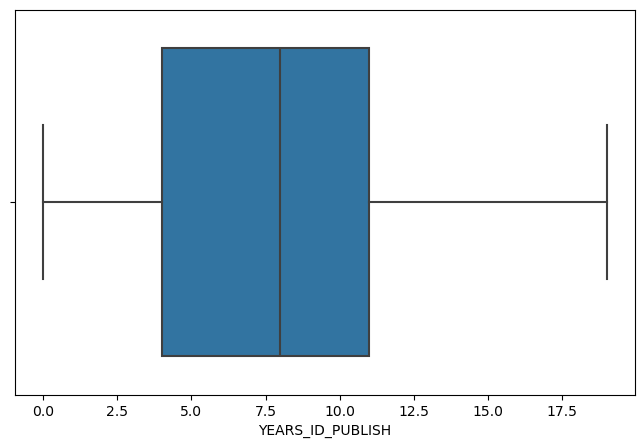

count    307511.000000
mean          2.225114
std           2.193674
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


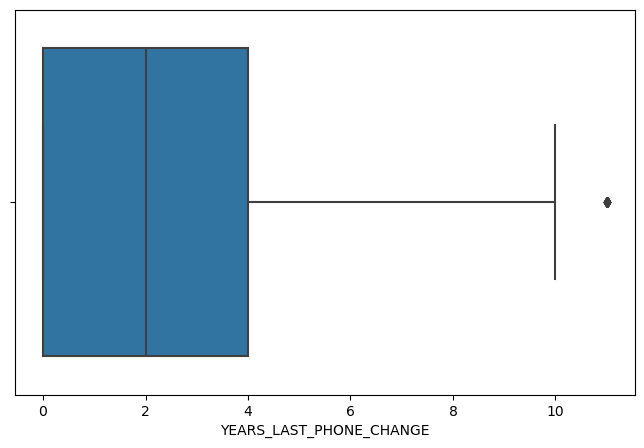

In [371]:
for col in num_cols_withoutflag:
    print(app_df[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=app_df,x=col)
    plt.show()

• Conclusion >> Few Columns are with outliers are below
1. AMT_INCOME_TOTAL Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers
2. AMT CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers
3. AMT ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers
4. AMT GOODS PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers
5. REGION_POPULATION_RELATIVE Column has a one outliers and there not much difference between mean and median

plot in (col) for Target 0 and 1


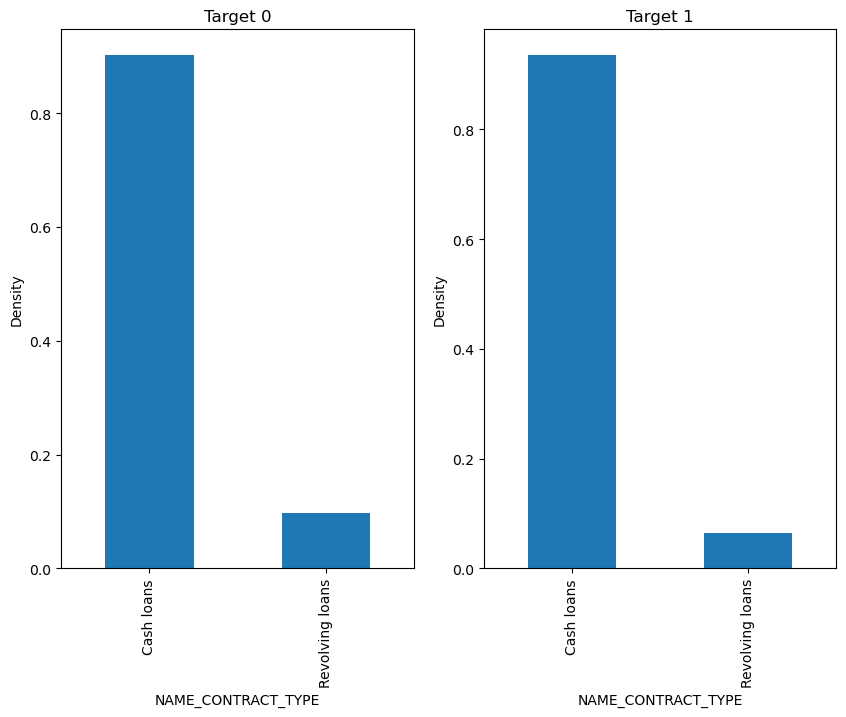

plot in (col) for Target 0 and 1


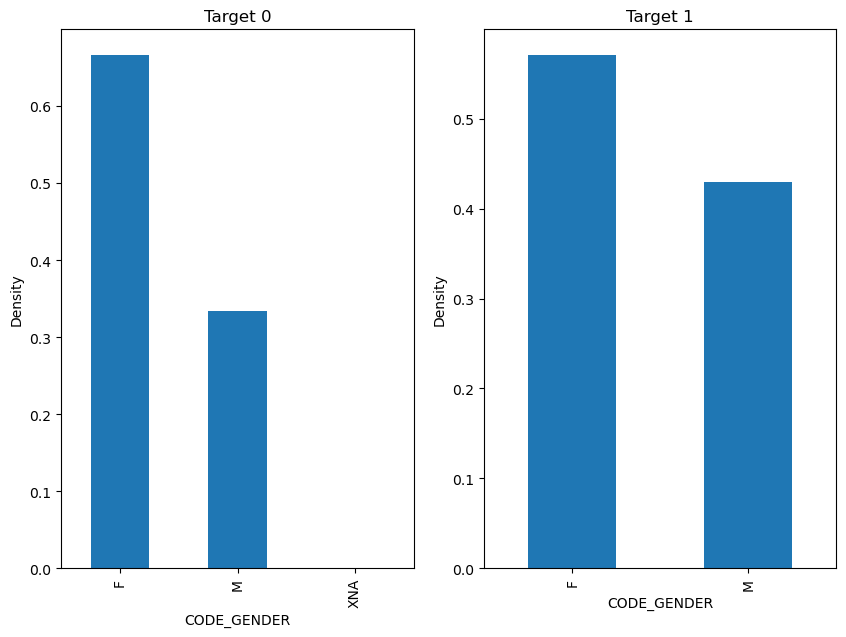

plot in (col) for Target 0 and 1


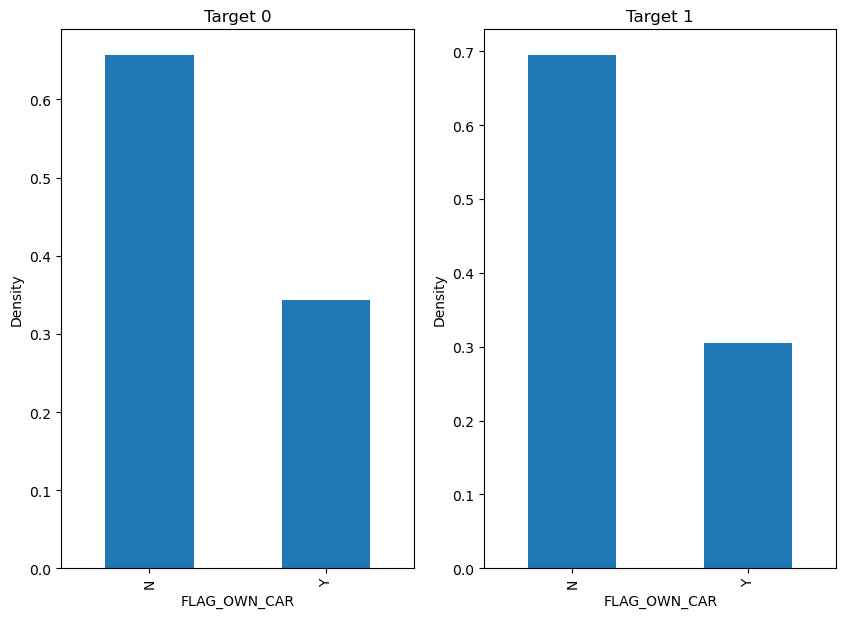

plot in (col) for Target 0 and 1


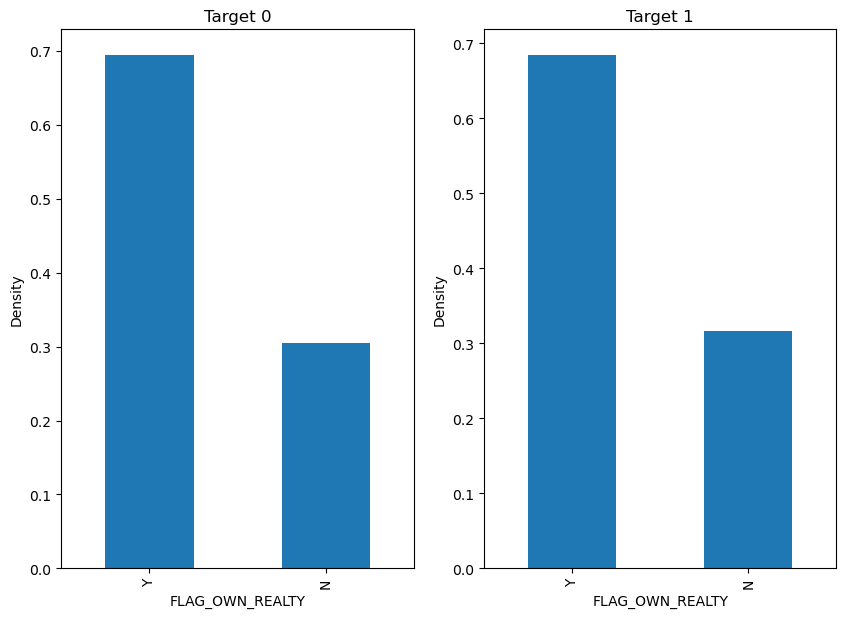

plot in (col) for Target 0 and 1


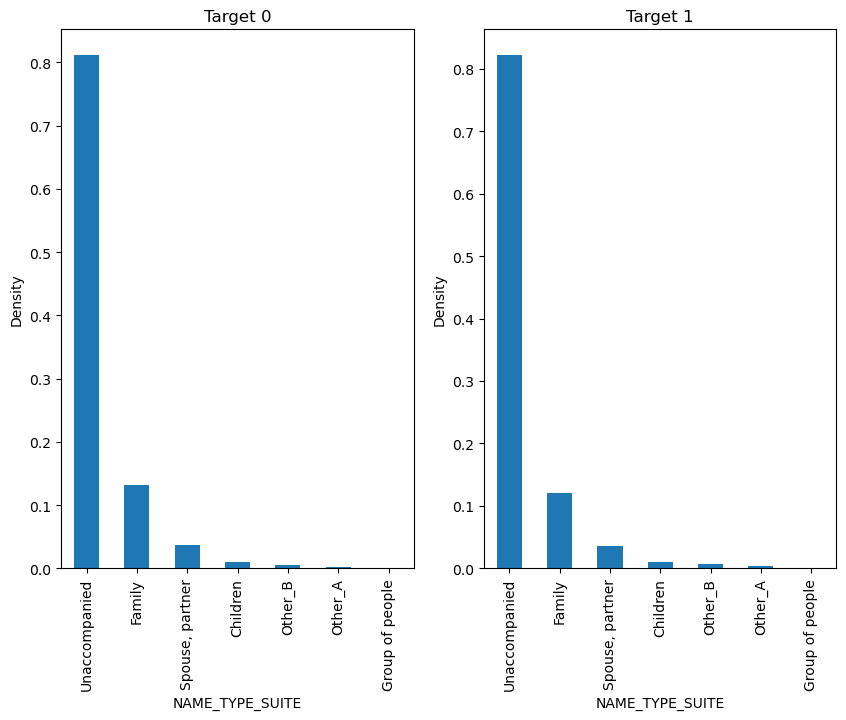

plot in (col) for Target 0 and 1


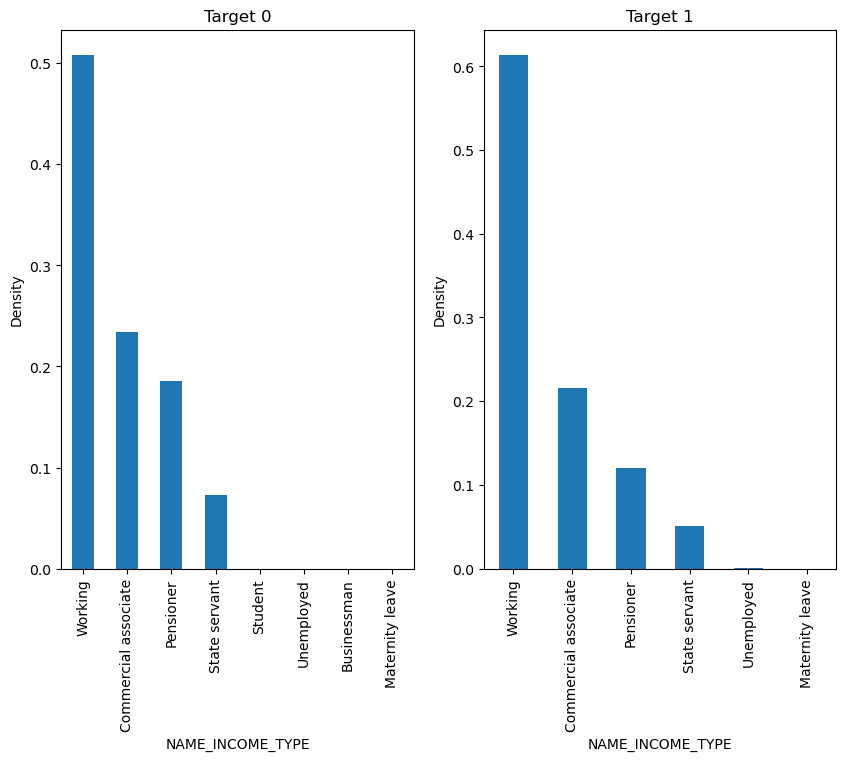

plot in (col) for Target 0 and 1


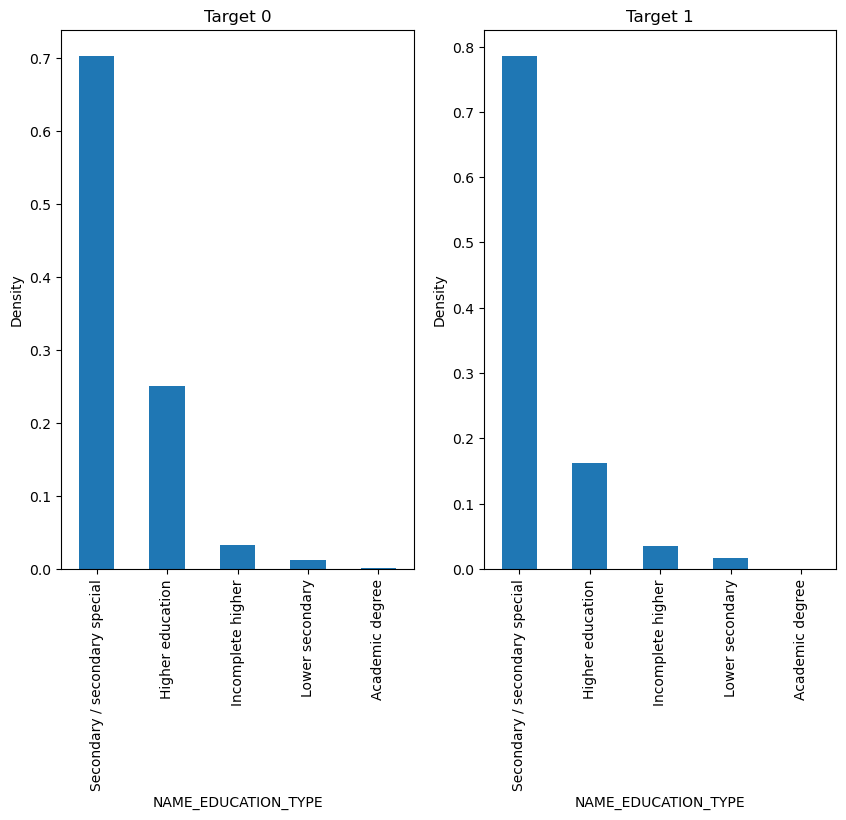

plot in (col) for Target 0 and 1


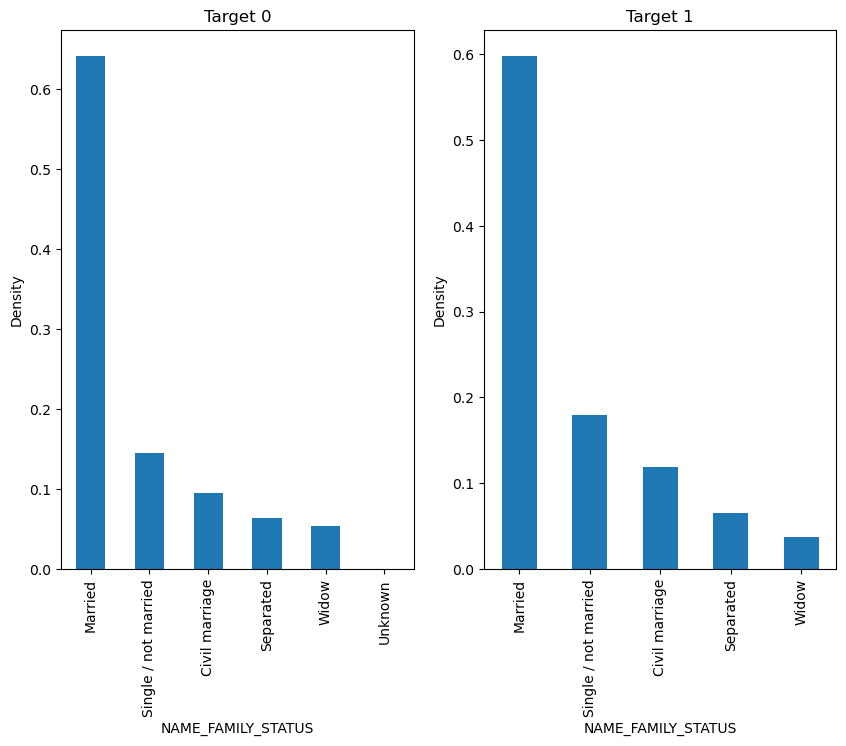

plot in (col) for Target 0 and 1


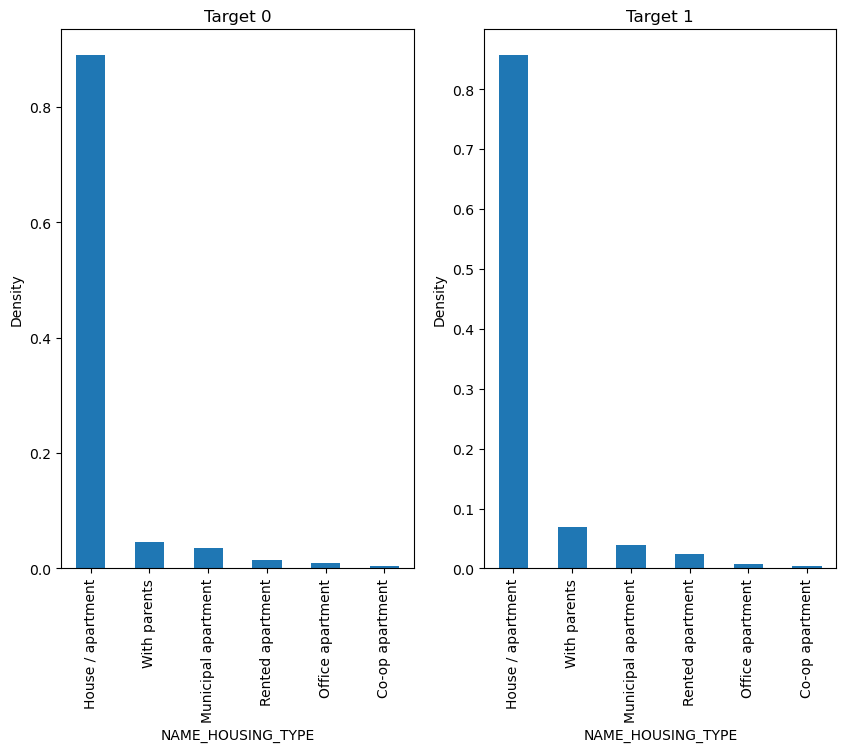

plot in (col) for Target 0 and 1


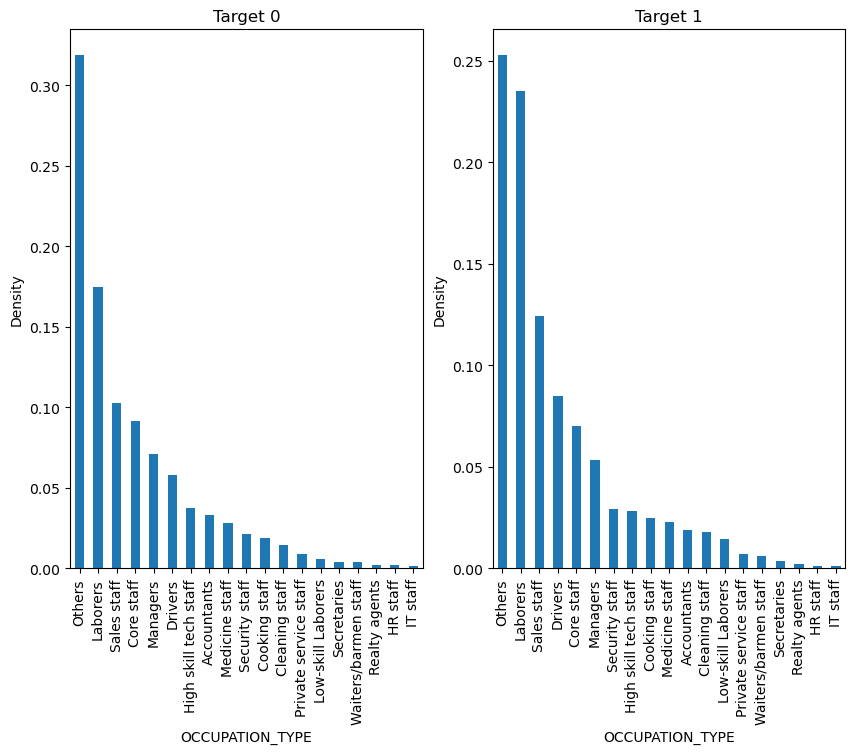

plot in (col) for Target 0 and 1


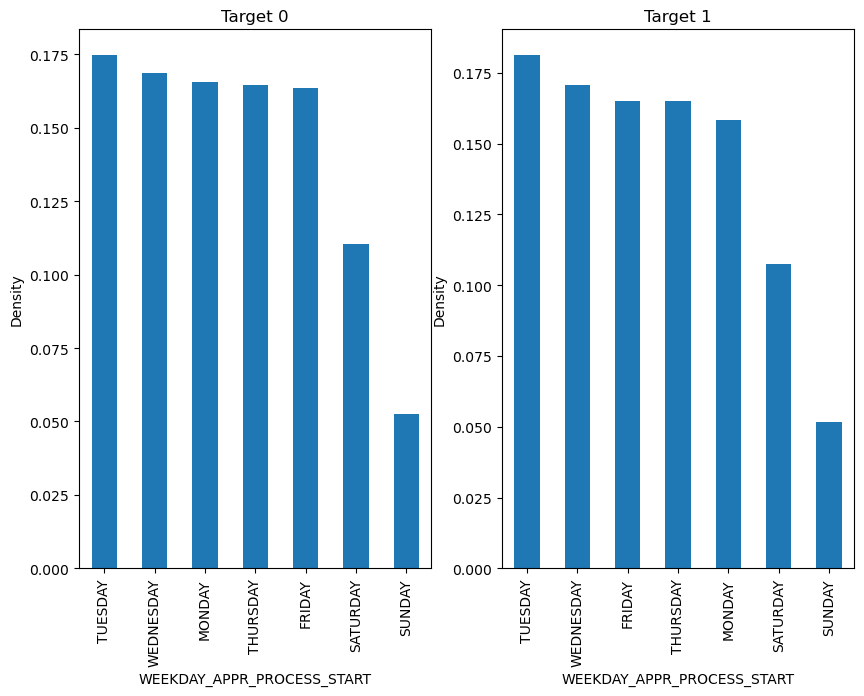

plot in (col) for Target 0 and 1


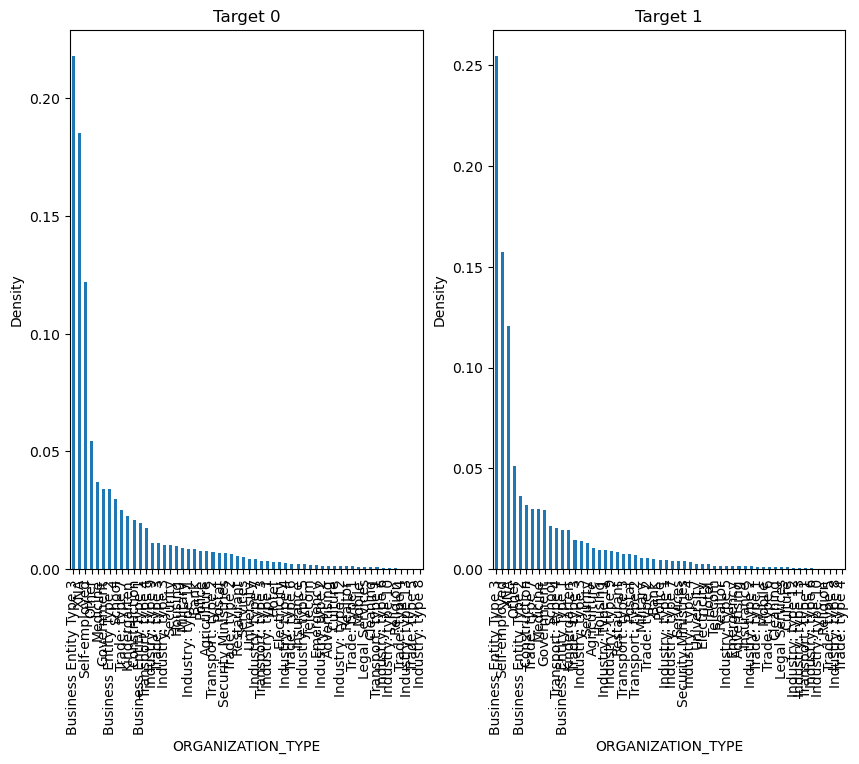

In [372]:
for col in cat_cols:
    print(f"plot in (col) for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title('Target 0')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title('Target 1')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

Conclusion >> Below are the column insights
1. NAME CONTRACT TYPE- The Applicants are receiving more of Cash loans than Revolving loans both for Target 0 and 1
2. CODE GENDER - Number of Female applicants are twice than that of male applicants both for Target 0 and 1
3. FLAG_OWN CAR - Most(70%) of the applicants do not own a car both for Target 0 and 1
4.FLAG_OWN REALTY-Most (70%) of the applicants do not own a house both for Target 0 and 1
5. NAME_TYPE_SUITE - Most(81%) of the applicants are Unaccompanied both for Target 0 and 1
6.NAME_INCOME_TYPE - For both Target 0 and 1, Most (51%) of the applicants are earning their income from Work
7. NAME EDUCATION_TYPE - For both Target 0 and 1, almost 71% of the applicants have completed Secondary/secondary special education
8. NAME_FAMILY_STATUS - 63% of the applicants are married for both Target 0 and 1
9. NAME HOUSING_TYPE - 88% of the housing type of applicants are House/apartment for both Target 0 and 1
10. OCCUPATION_TYPE - Most (31%) of the applicants have other Occupation type, are non defaulters and Laborere, Sales staff, Drivers and core staff are not able to repay the loan on time
11. WEEKDAY_APPR_PROCESS_START- Most of the applicant have pplied the loan on Tuseday and the least on Sunday
12. ORGANIZATION_TYPE - Most of the Applicants are working in Business Entity Type 3, Self Employed and other Organization type

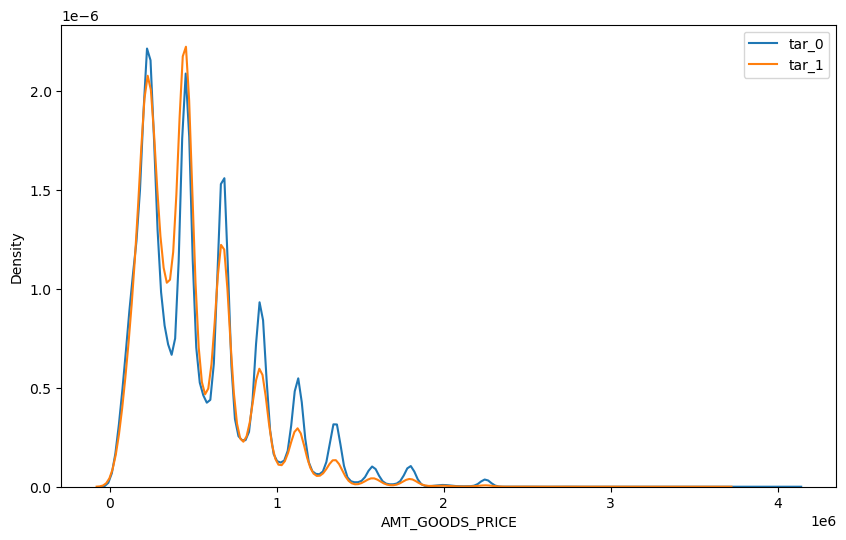

In [373]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'],label='tar_0',hist=False)
sns.distplot(tar_1['AMT_GOODS_PRICE'],label='tar_1',hist=False)
plt.legend()
plt.show()

-Conclusion:
The price of goods for which loan is given has same variation for target 1 and 0

## Bivariate and Multivariate Analysis

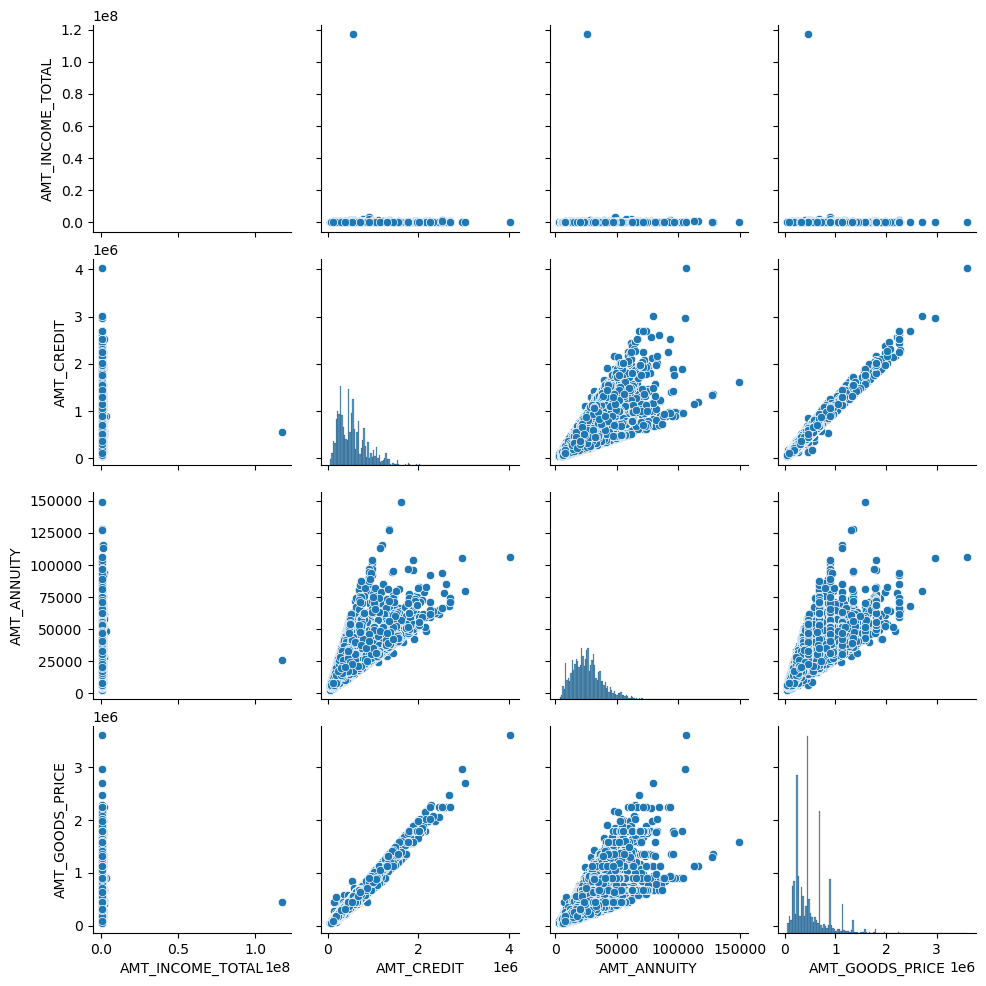

In [374]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]])
plt.show()


• Conclusion >> For Applicants who are unable to replay the loan on time
1. AMT CREDIT Increases or varies linearly with AMT GOODS PRICE and AMT_CREDIT Increases with AMT_ANNUITY 2. AMT ANNUITY Increases with Increases in AMT_GOODS PRICE and AMT_Credit
3. AMT GOODS PRICE Increases with Increases in AMT_Credit and AMT_ANNUITY
4. AMT_INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE

## Correlation between numerical columns

In [375]:
corr_data=app_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']]
corr_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,25,1,9,5,3
1,270000.0,1293502.5,35698.5,1129500.0,45,3,3,0,2
2,67500.0,135000.0,6750.0,135000.0,52,0,11,6,2
3,135000.0,312682.5,29686.5,297000.0,52,8,26,6,1
4,121500.0,513000.0,21865.5,513000.0,54,8,11,9,3


In [376]:
corr_data.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159632,-0.027226,-0.063836,-0.027783,-0.008648,0.018592
AMT_CREDIT,0.156870,1.000000,0.770127,0.986734,0.055408,-0.064319,-0.009521,0.006831,0.077057
AMT_ANNUITY,0.191657,0.770127,1.000000,0.774837,-0.009453,-0.102853,-0.038375,-0.011100,0.064893
AMT_GOODS_PRICE,0.159632,0.986734,0.774837,1.000000,0.053484,-0.062191,-0.011456,0.009571,0.079095
YEARS_BIRTH,-0.027226,0.055408,-0.009453,0.053484,1.000000,0.623879,0.331704,0.271453,0.086527
YEARS_EMPLOYED,-0.063836,-0.064319,-0.102853,-0.062191,0.623879,1.000000,0.214592,0.274460,-0.016393
YEARS_REGISTRATION,-0.027783,-0.009521,-0.038375,-0.011456,0.331704,0.214592,1.000000,0.101373,0.058831
YEARS_ID_PUBLISH,-0.008648,0.006831,-0.011100,0.009571,0.271453,0.274460,0.101373,1.000000,0.093213
YEARS_LAST_PHONE_CHANGE,0.018592,0.077057,0.064893,0.079095,0.086527,-0.016393,0.058831,0.093213,1.000000


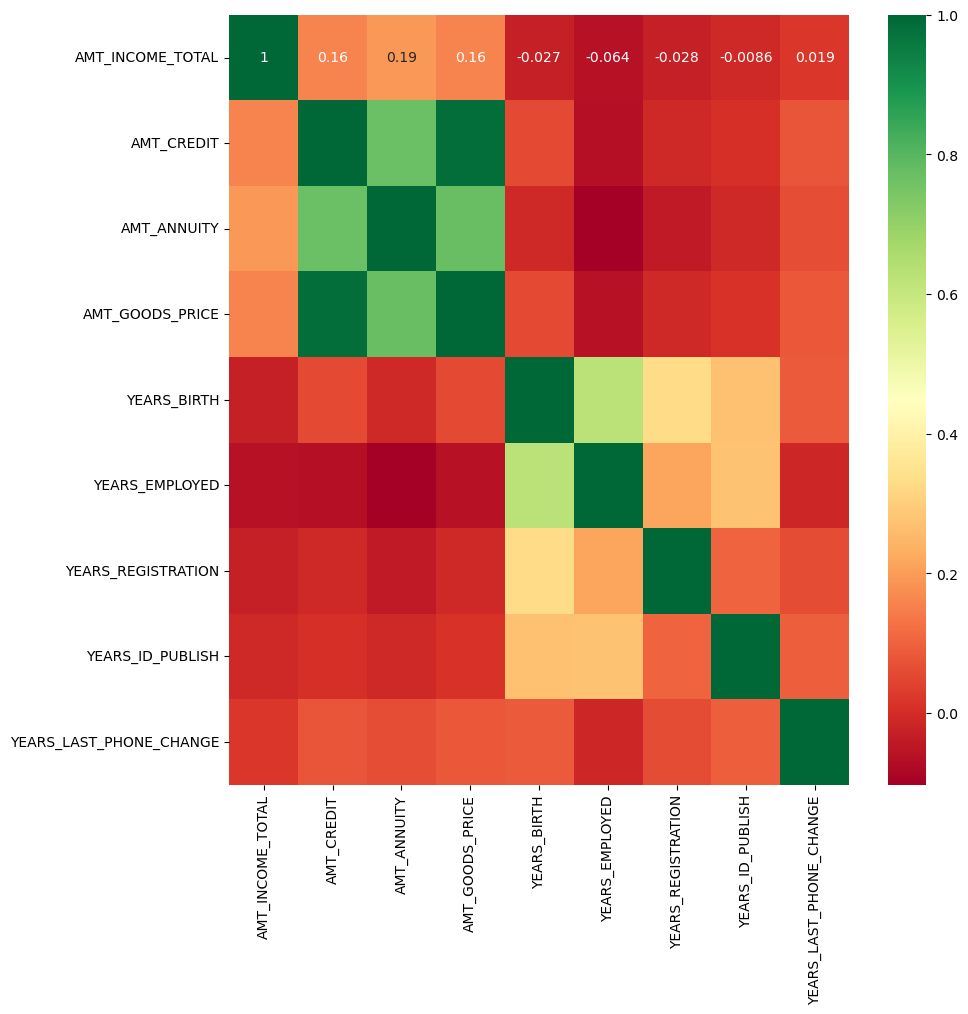

In [377]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True,cmap='RdYlGn')
plt.show()


• Conclusion >>
1. AMT INCOME_TOTAL - It has a positive corelation index of 0.34.0.42.0.35 with AMT_CREDIT,AMT_ANNUITY,AMT GOODS PRICE respectively and Negative with most of the other Year columns
2. AMT CREDIT - Is has a strong positive coreltaion index of 0.99,0.77 with AMT_GOODS PRICE, AMT_ANNUITY respectively.
3. AMT ANNUITY - Is has positive coreltaíon index of 0.77,0.78 with AMT_CREDIT,AMT_GOODS PRICE respectively and Negative with most of the other Year columns
4. AMT GOODS PRICE - It has a strong positive corelation index 0.78,0.99 with AMT_ANNUITY, AMT_CREDIT

In [378]:
#Splitting numerical variables based on target 0 and 1 to find corelation
corr_data_0=tar_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']]
corr_data_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
1,270000.0,1293502.5,35698.5,1129500.0,45,3,3,0,2
2,67500.0,135000.0,6750.0,135000.0,52,0,11,6,2
3,135000.0,312682.5,29686.5,297000.0,52,8,26,6,1
4,121500.0,513000.0,21865.5,513000.0,54,8,11,9,3
5,99000.0,490495.5,27517.5,454500.0,46,4,13,1,6


In [379]:
corr_data_1=tar_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']]
corr_data_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,25,1,9,5,3
26,112500.0,979992.0,27076.5,702000.0,51,7,18,5,0
40,202500.0,1193580.0,35028.0,855000.0,47,3,3,2,2
42,135000.0,288873.0,16258.5,238500.0,36,9,0,12,4
81,81000.0,252000.0,14593.5,252000.0,67,1000,14,11,0


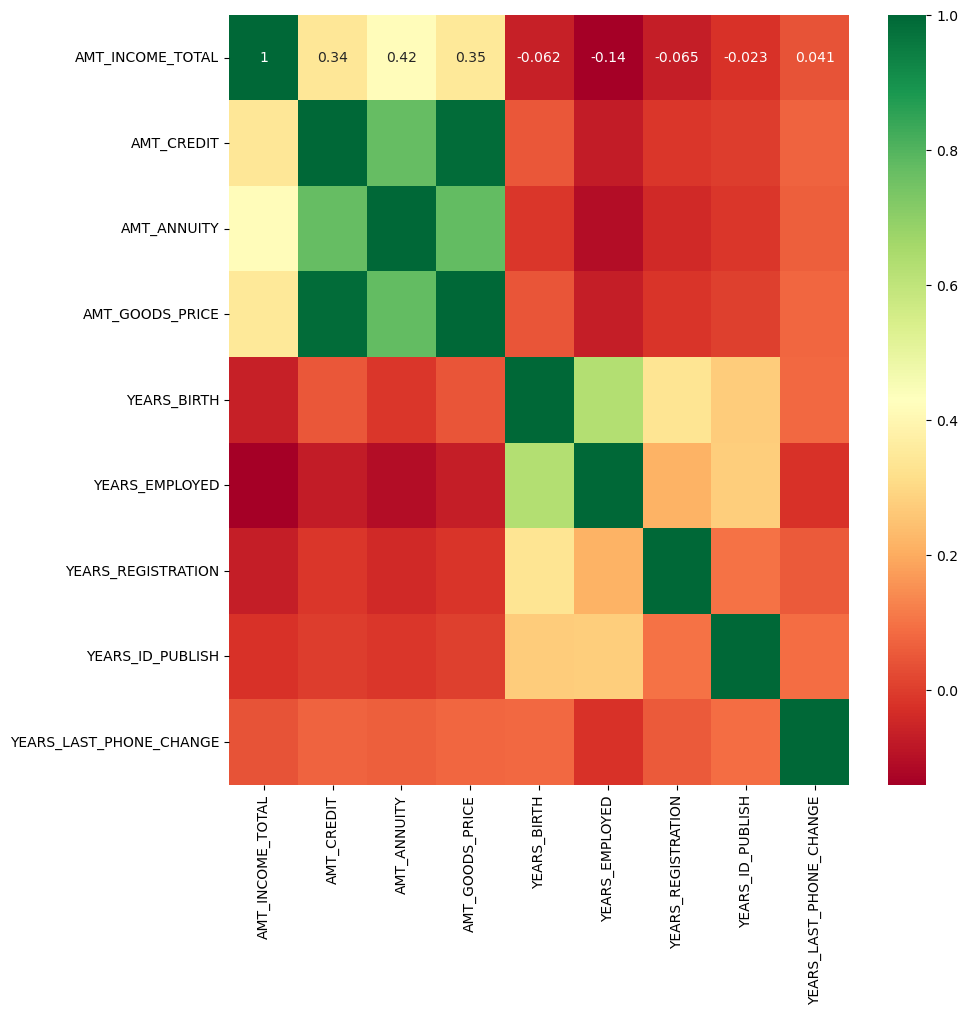

In [380]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True,cmap='RdYlGn')
plt.show()

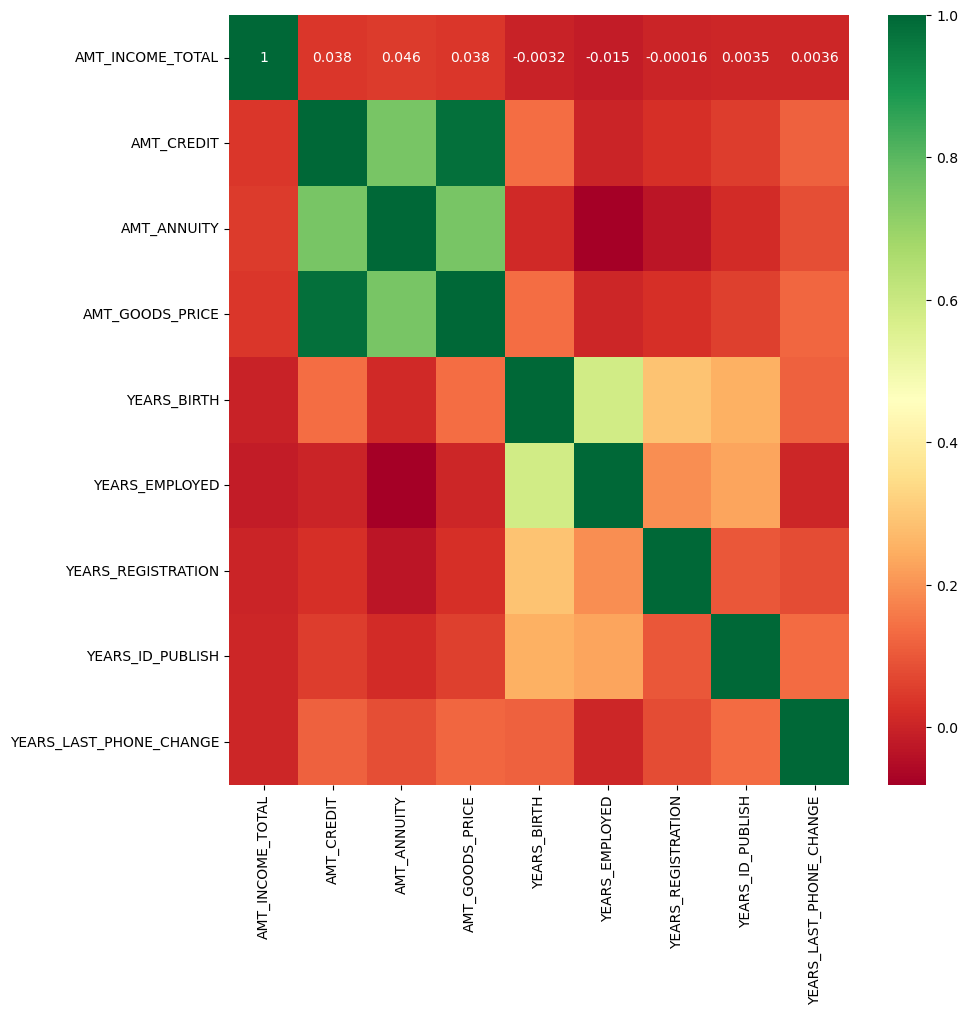

In [381]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True,cmap='RdYlGn')
plt.show()


• Conclusion >>
1. AMT INCOME_TOTAL - It is less correlated with AMT_CREDITAMT_ANNUITY AMT GOODS PRICE respectively
2. AMT CREDIT - Is has a strong positive coreltaion index of 0.98,0.75 with AMT GOODS PRICE, AMT_ANNUITY respectively and also positive corelation with other Year Columns
3. AMT ANNUITY - Is has positive coreltaion index of 0.75 with AMT_CREDIT,AMT_GOODS PRICE and Negative with YEAR EMPLOYED, YEAR REGISTRATION
4. AMT GOODS PRICE - It has a strong positive corelation index 0.75,0.98 with AMT_ANNUITY, AMT_CREDIT and weak positive corelation with other Year columns

# Previous Application CSV

In [382]:
papp_data = pd.read_csv('previous_application.csv')
papp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [384]:
papp_data.shape

(1670214, 37)

Quality Check

In [385]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [386]:
perc=49
threshold_p=int(((100-perc)/100)*papp_data.shape[0] +1)
papp_df = papp_data.dropna(axis=1,thresh=threshold_p)
papp_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [387]:
papp_df.shape

(1670214, 32)

### Impute missing values

In [388]:
for col in papp_df.columns:
    if papp_df[col].dtypes == np.int64 or papp_df[col].dtypes == np.float64:
        papp_df[col]=papp_df[col].apply(lambda x: abs(x))

## We'll validate if any null value is present in dataset


In [389]:
null_cols_1=list(papp_df.columns[papp_df.isna().any()])
len(null_cols_1)

11

# Binning of continuous variables
### Binning of AMT_CREDIT Column

In [390]:
papp_df.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [391]:
papp_df['AMT_CREDIT_Category'] = pd.cut(papp_df.AMT_CREDIT, [0, 200000, 400000, 600000, 800000, 1000000],
                                       labels=['Very low Credit', 'Low Credit', 'Medium Credit', 'High Credit', 'Very High Credit'])

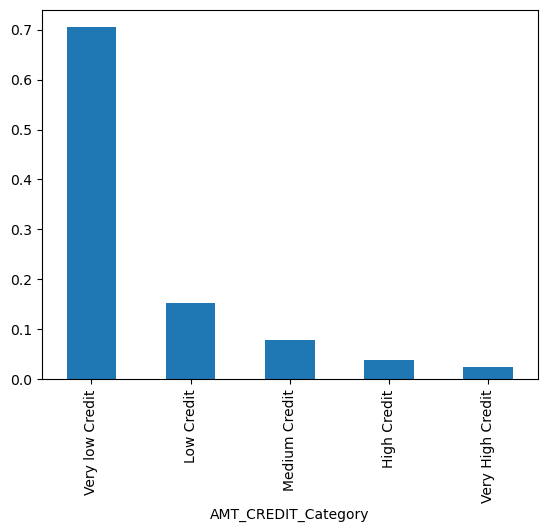

In [392]:
papp_df['AMT_CREDIT_Category'].value_counts(normalize=True).plot.bar()
plt.show()

-Conclusion >> Credit amount for most applicants is low (200000-400000)

### Data Imbalance Check

In [393]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS =='Approved']
cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Canceled']
refused = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Refused']
unused = papp_df[papp_df.NAME_CONTRACT_STATUS == 'Unused offer']

In [394]:
#cancelled
#approved

In [395]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

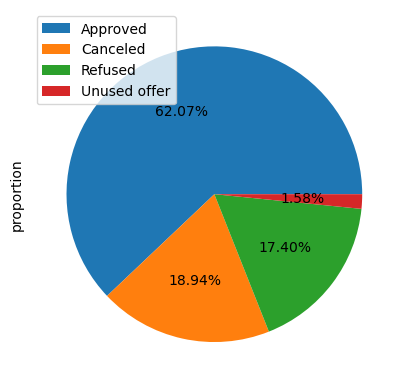

In [396]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
plt.legend()
plt.show()

-Conclusion >> 62% of the applications are approved, 18% are cancelled, 17% are refused(defaulters) and 1% are unused

## Univariate analysis

In [397]:
cat_cols = list(papp_df.columns[papp_df.dtypes == np.object_])
num_cols = list(papp_df.columns[(papp_df.dtypes == np.int64) | (papp_df.dtypes == np.float64)])

In [398]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [399]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [400]:
cat_cols=['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

### Plot on categorical columns

NAME_CONTRACT_TYPE
Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: proportion, dtype: float64


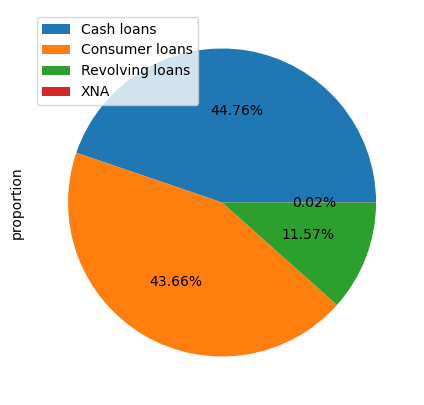

WEEKDAY_APPR_PROCESS_START
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: proportion, dtype: float64


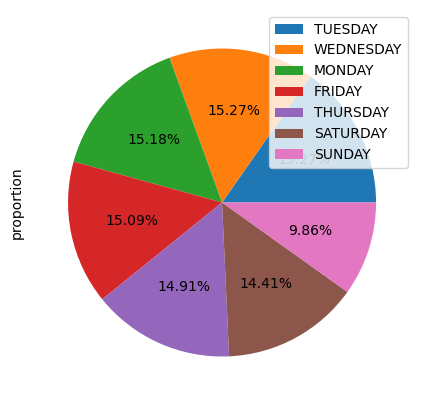

WEEKDAY_APPR_PROCESS_START
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: proportion, dtype: float64


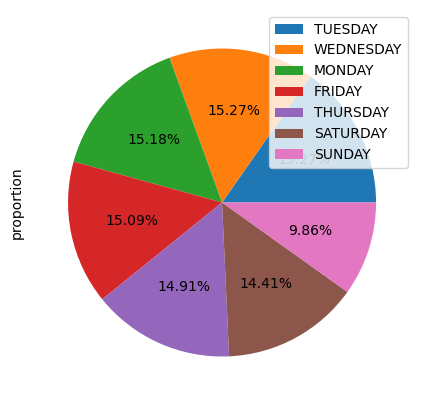

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64


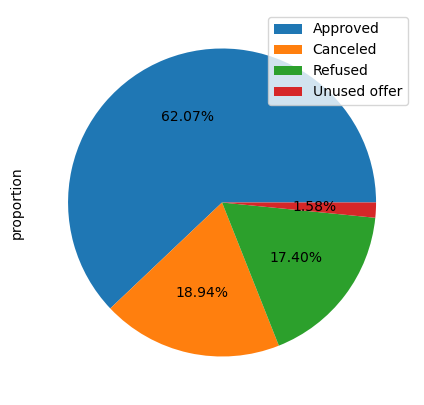

NAME_PAYMENT_TYPE
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: proportion, dtype: float64


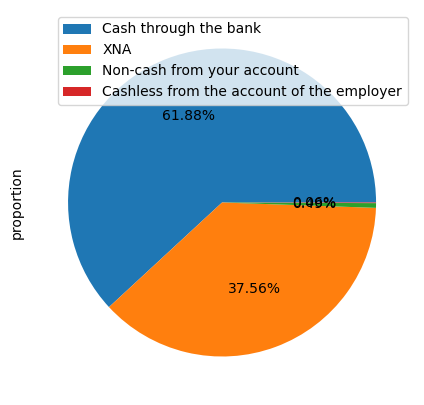

NAME_CLIENT_TYPE
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: proportion, dtype: float64


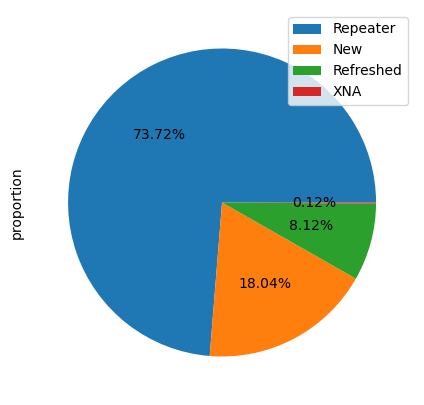

NAME_SELLER_INDUSTRY
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: proportion, dtype: float64


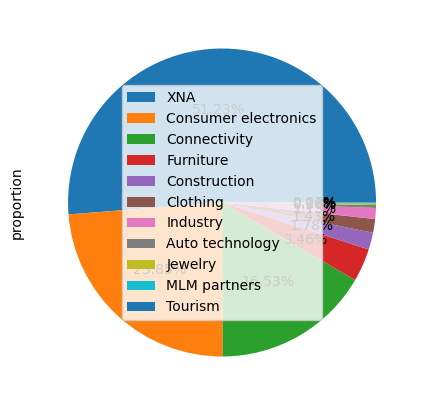

NAME_YIELD_GROUP
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: proportion, dtype: float64


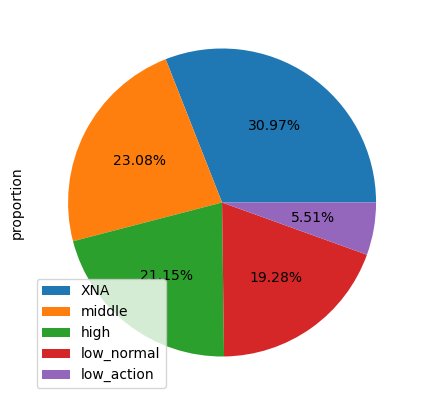

PRODUCT_COMBINATION
Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: proportion, dtype: float64


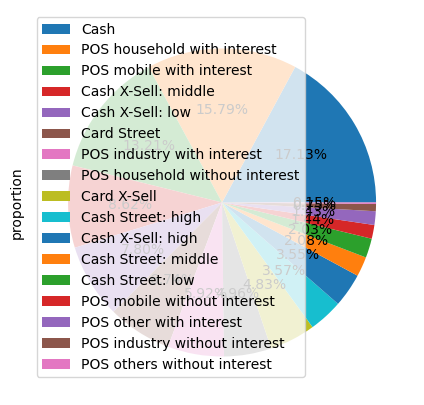

In [401]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize=True)*100)
    plt.figure(figsize=(5,5))
    papp_df[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
    plt.legend()
    plt.show()

-Conclusions >>

• Conclusion >>
1. NAME_CONTRACT_TYPE - 45% Applicants received Cash loans,44% Applicants received Consumer loans, 12% received Revolving during previous
application
2. WEEKDAY APPR_PROCESS_START - All the days have almost equal number of previous loan application
3. NAME_CONTRACT_STATUS - 62% of applications are approved, 19% Cancelled, 17% Refused and 2% unused
4. NAME_PAYMENT_TYPE - 62% of Payment type are Cash through bank, 32% Other modes
5. NAME_CLIENT_TYPE - 74% of Applicants are Repeaters, 18% are New applicants, 8% are Refreshed Appplicants
6. NAME SELLER_INDUSTRY - 51% are from other Industries, 24%,17% are from Consumer electronics, Connectivity Industry respectively
7. CHANNEL TYPE - 43% Channel type is Credit and cash offices, 29% are country wide
8. NAME YIELD_GROUP - Majority of the yield group are others
9. PRODUCT_COMBINATION - Most used PRODUCT COMBINATION is Cash followed by POS household with interest, POS mobile with interest

## Plot on numerical Columns

In [402]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

count    1.670214e+06
mean     1.923089e+06
std      5.325980e+05
min      1.000001e+06
25%      1.461857e+06
50%      1.923110e+06
75%      2.384280e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64


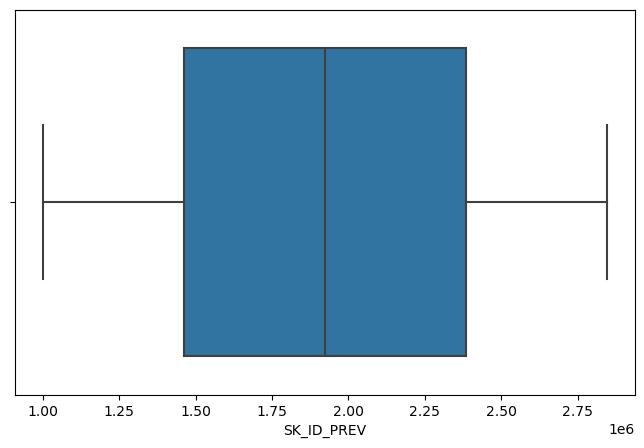

count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64


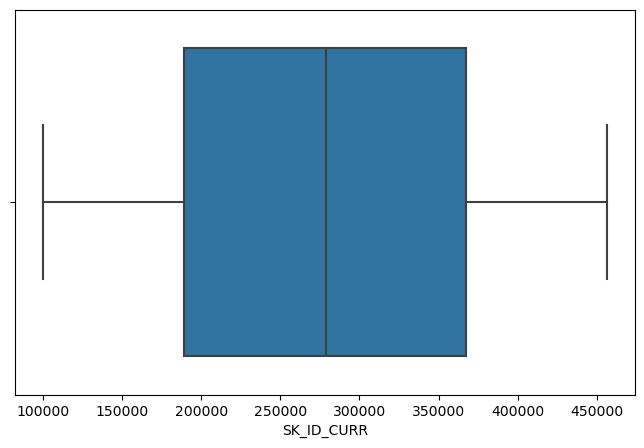

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


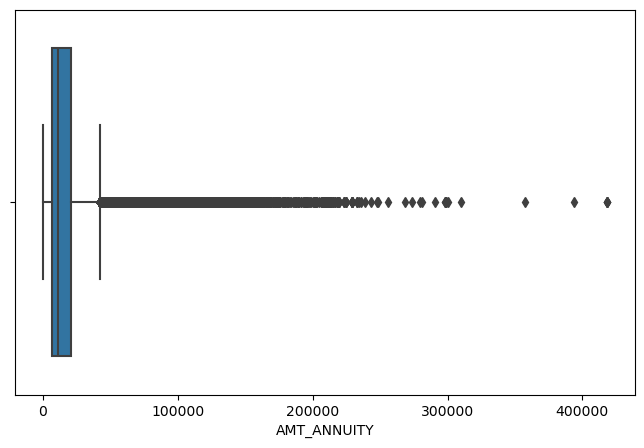

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


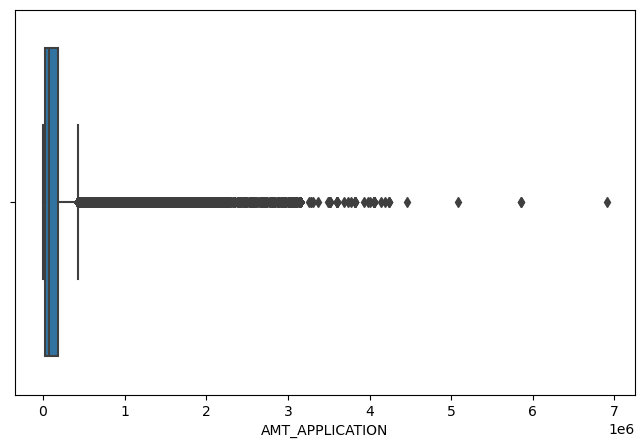

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


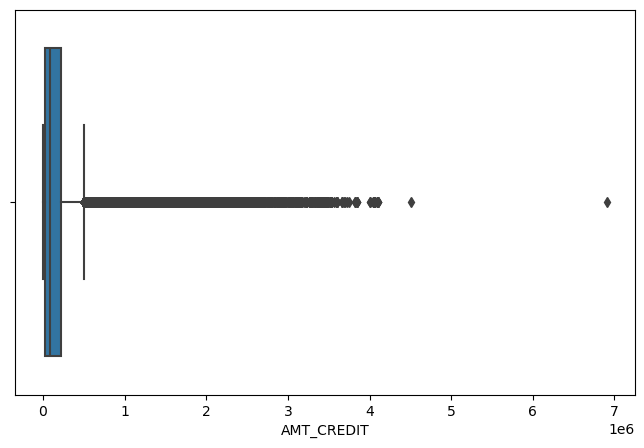

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


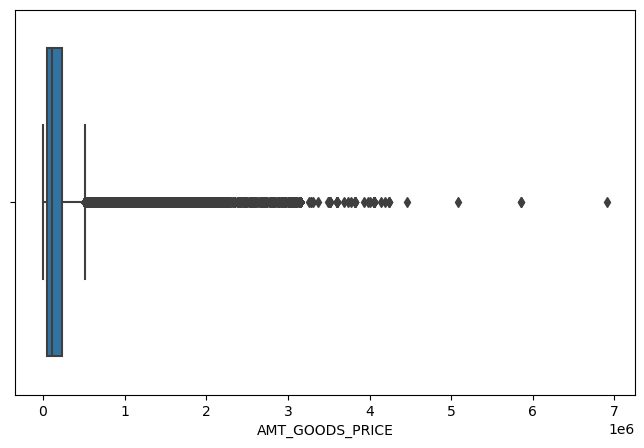

count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


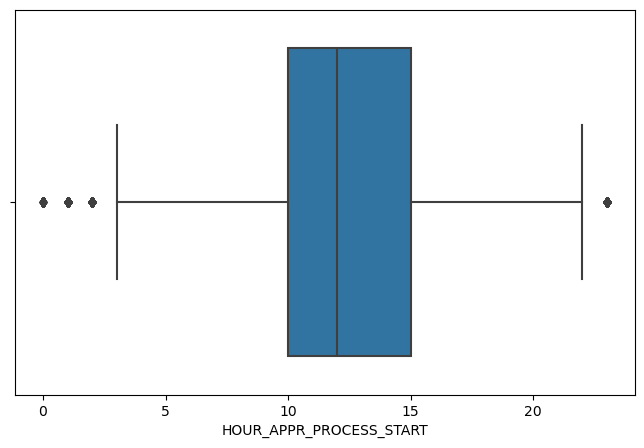

count    1.670214e+06
mean     9.964675e-01
std      5.932963e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64


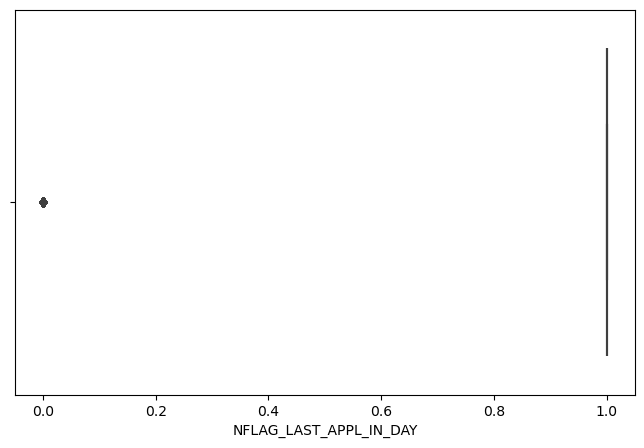

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


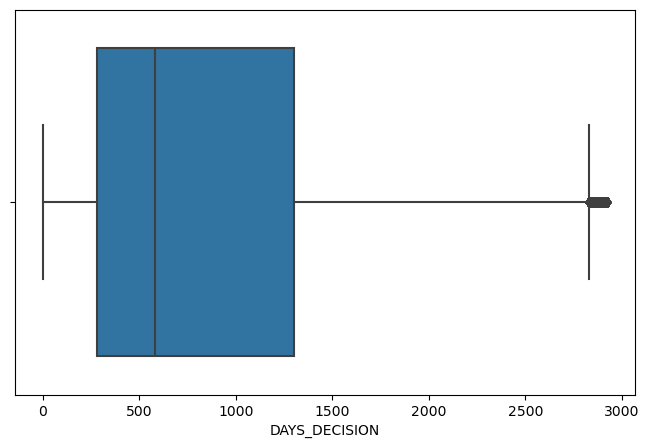

count    1.670214e+06
mean     3.148644e+02
std      7.127403e+03
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64


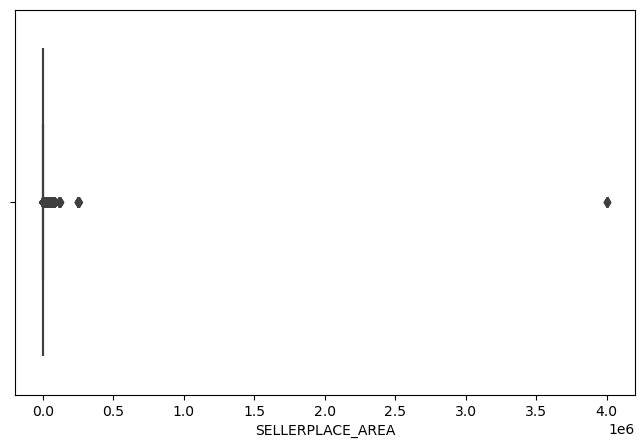

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


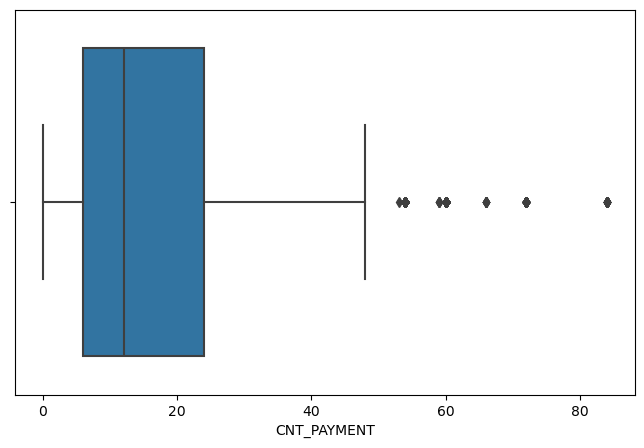

count    997149.000000
mean     342340.056543
std       88413.495220
min           2.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64


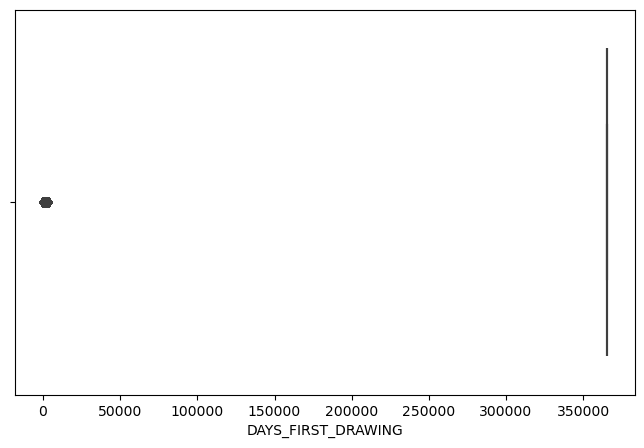

count    997149.000000
mean      15949.224065
std       72007.270877
min           2.000000
25%         475.000000
50%         921.000000
75%        1825.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64


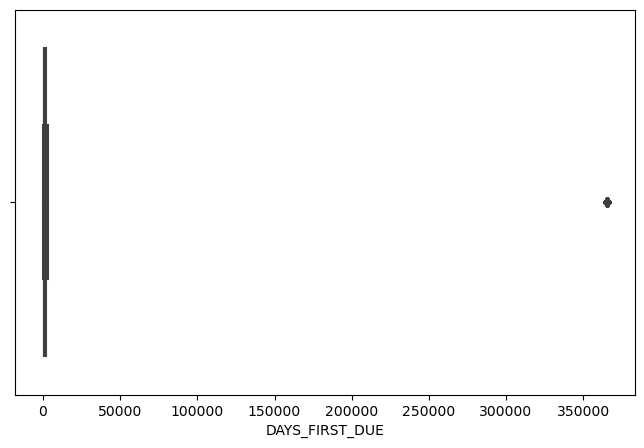

count    997149.000000
mean      35163.363265
std      106405.950190
min           0.000000
25%         257.000000
50%         741.000000
75%        1735.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


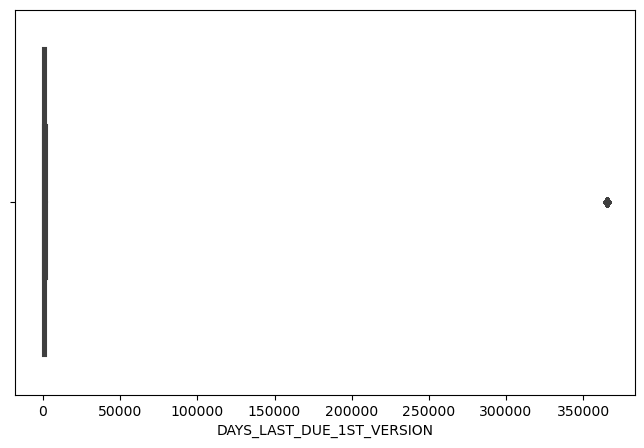

count    997149.000000
mean      78152.730207
std      148833.342466
min           2.000000
25%         455.000000
50%        1155.000000
75%        2418.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64


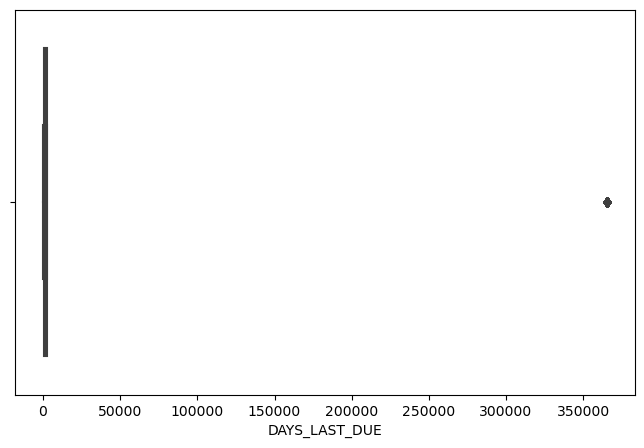

count    997149.000000
mean      83505.775017
std      152484.418802
min           2.000000
25%         447.000000
50%        1171.000000
75%        2501.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64


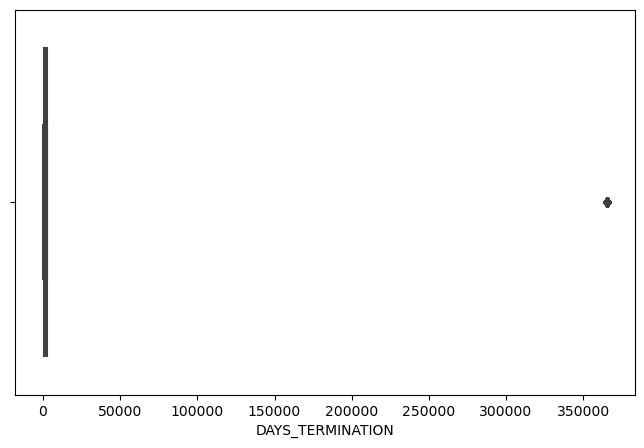

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64


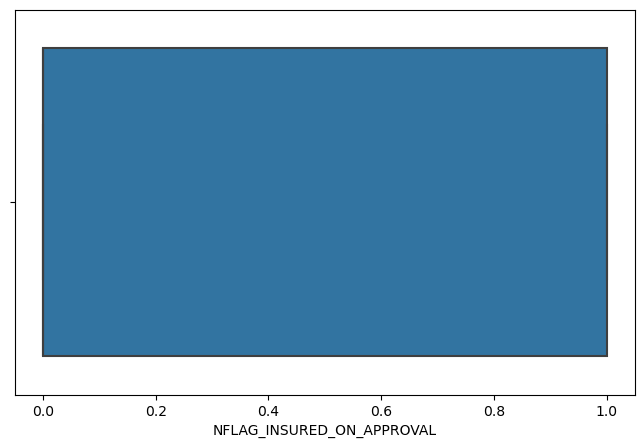

In [403]:
for col in num_cols:
    print(papp_df[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=papp_df,x=col)
    plt.show()

-Conclusion >> Are listed below

1.HOUR_APPR_PROCESS_START has few outliers and there small difference between mean and median.

2.AMT_CREDIColumn has a few outliers and there is a huge differenve between the 99th percentile and the max value. also we could see significant variation in mean and median due to outliers.

3.AMT_ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant
variation in mean and median due to outliers

4.AMT_GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see
significant variation in mean and median due to outliers

5.AMT_APPLICATION Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge
variation in mean and median due to outliers

6.CNT_PAYMENT Column has few outliers and there small difference between mean and median

7.DAYS_DECISION has few outliers and there small difference between mean and median


# Bivariate and Multiverse Anlaysis

#### Bivariate Analysis between WEEKDAY_APPR_PROCESS_START VS AMT_APPLICATION

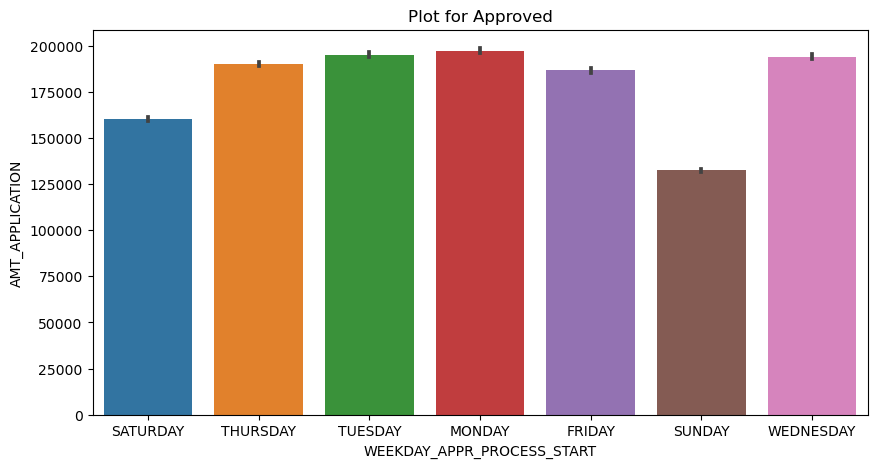

In [404]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION', data=approved)
plt.title('Plot for Approved')
plt.show()

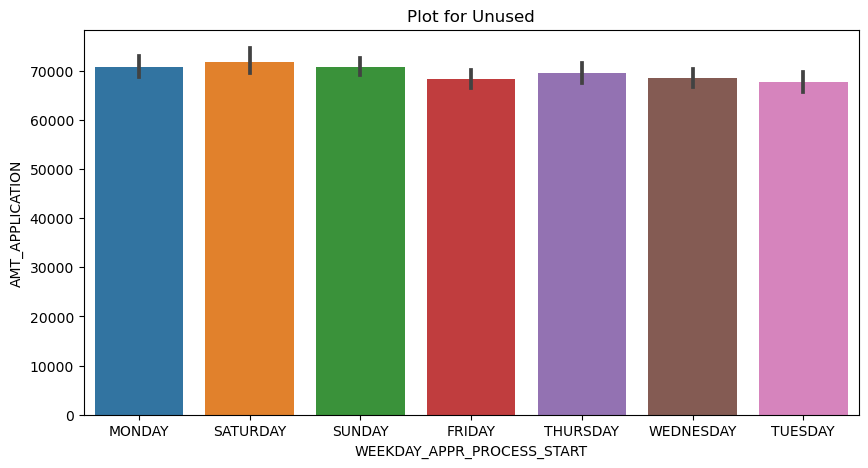

In [405]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION', data=unused)
plt.title('Plot for Unused')
plt.show()

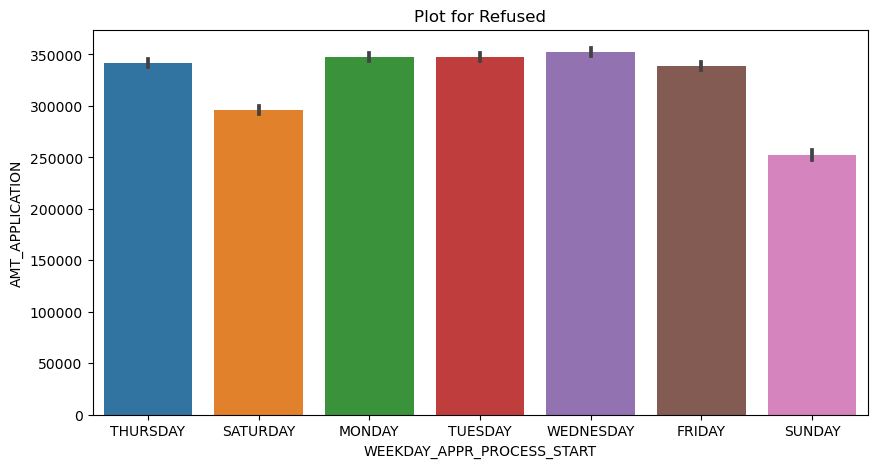

In [406]:
plt.figure(figsize=(10,5))
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION', data=refused)
plt.title('Plot for Refused')
plt.show()


• Conclusion >>
1. The Credit Amount of applicants with approved status is high on Monday and Wednesday than other days, and least on Sunday
2. The Credit Amount of applicants with cancelled status is high on Sunday and almost equal on other days
3. The Credit Amount of applicants with rejected status is least on Sunday and more on Monday and Wednesday
4. The Credit Amount of applicants with unused offer status is almost equal on all daysdays

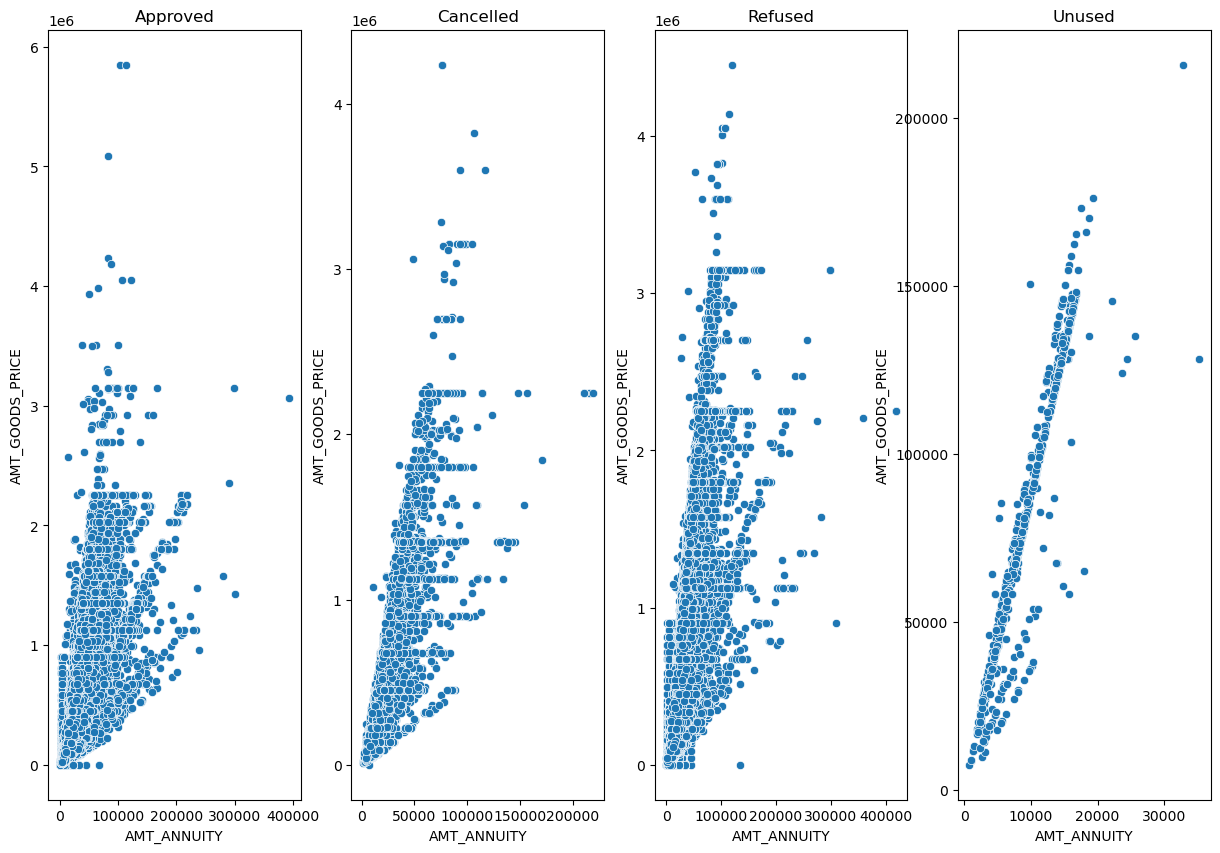

In [407]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot (x='AMT_ANNUITY',y='AMT_GOODS_PRICE', data=approved)
plt.subplot(1,4,2)
plt.title("Cancelled")
sns.scatterplot (x='AMT_ANNUITY',y='AMT_GOODS_PRICE', data=cancelled)
plt.subplot(1,4,3)
plt.title("Refused")
sns.scatterplot (x='AMT_ANNUITY',y='AMT_GOODS_PRICE', data=refused)
plt.subplot(1,4,4)
plt.title("Unused")
sns.scatterplot (x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=unused)
plt.show()

### Corelation between numerical Columns

In [408]:
corr_approved = approved [["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]
corr_refused =refused[["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]
corr_cancelled = cancelled [["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]
corr_unused =unused[["DAYS_DECISION", "AMT_ANNUITY","AMT_APPLICATION", "AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]

-Conclusion>>
1. For loan status as Approved,Refused and cancelled ammount of ammunity increases with goods price
2. For loan status as Refused  and approved it has no linear relationship
3. Unused looks to be following the most linear pattern

### For Approved

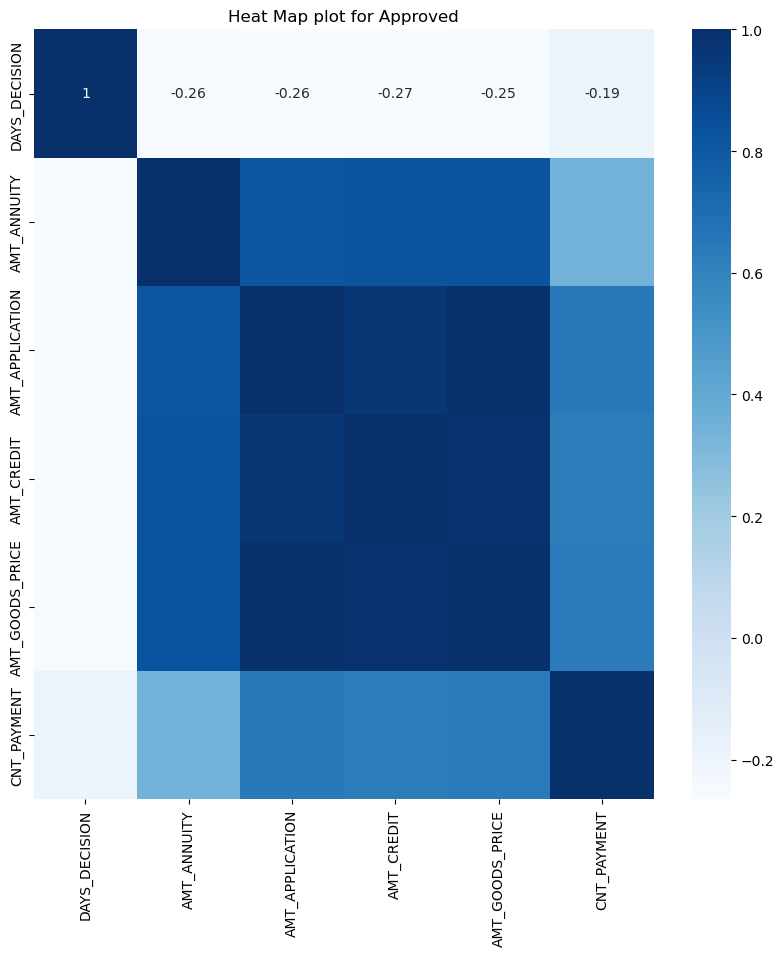

In [409]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_approved.corr(),annot=True,cmap='Blues')
plt.title('Heat Map plot for Approved')
plt.show()

-Conclusion >>
1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE, AMT_ANNUITY
2. DAYS_DECISION has negative Corelation with AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION,CNT_PAYMENT,AMT_ANNUITY

### For Cancelled

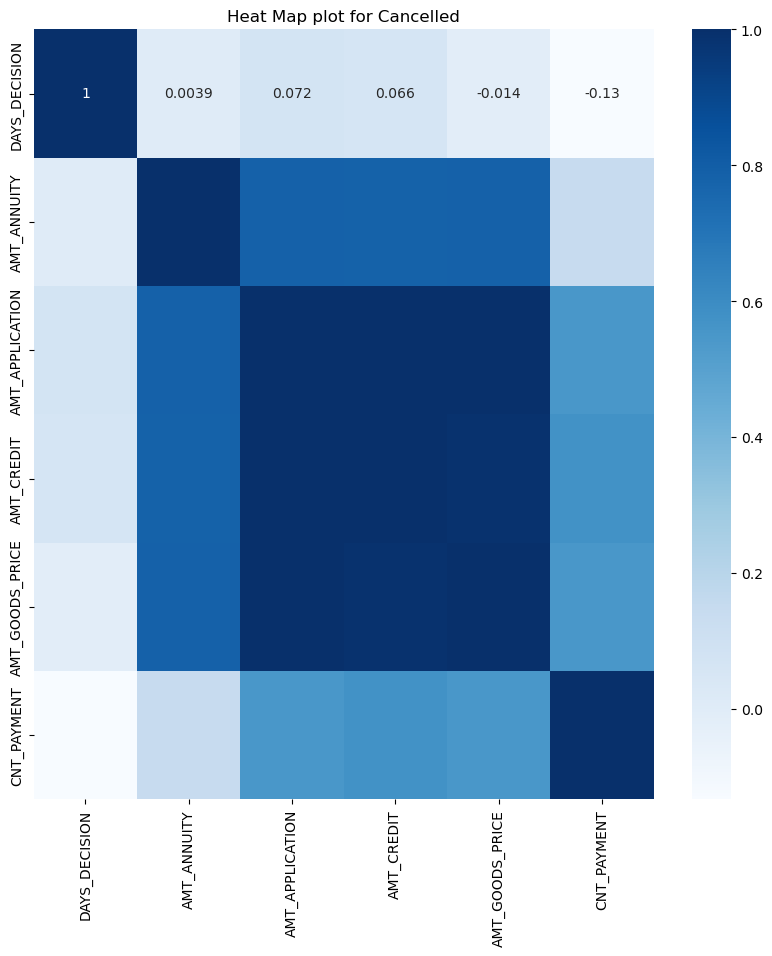

In [410]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_cancelled.corr(),annot=True,cmap='Blues')
plt.title('Heat Map plot for Cancelled')
plt.show()

-Conclusion:
1. DAYS_DECISION has positive Corelation with AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICAITON
2. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE

### For Unused

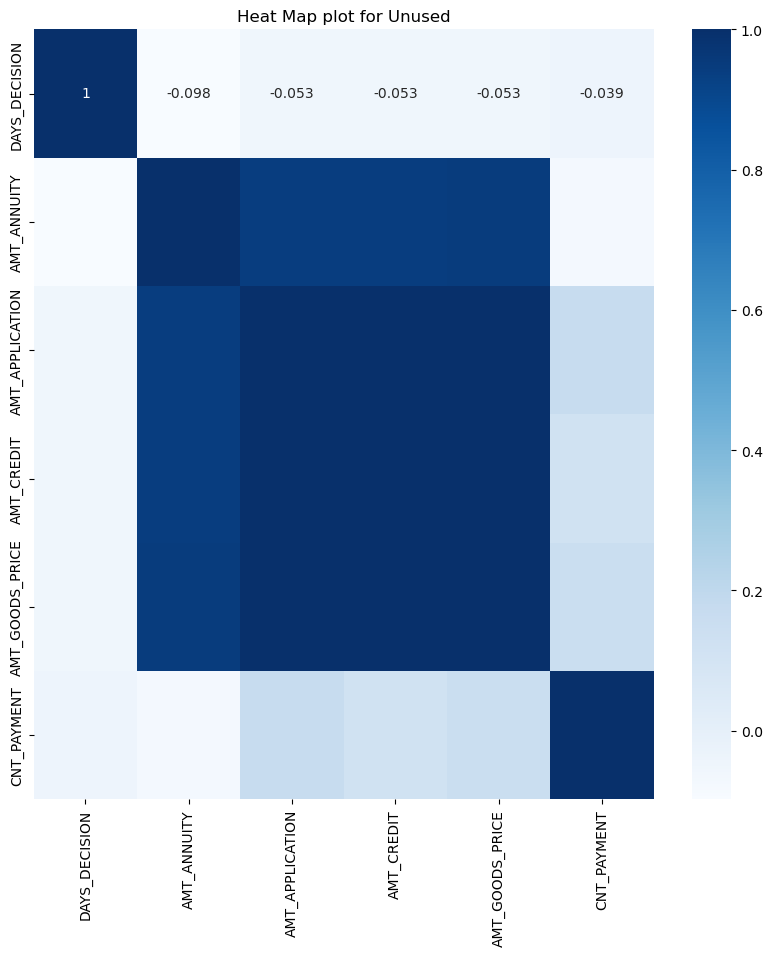

In [411]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_unused.corr(),annot=True,cmap='Blues')
plt.title('Heat Map plot for Unused')
plt.show()

-Conclusion:
1. DAYS_DECISION and CNT_PAYMENT has negative Corelation with AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICAITON
2. AMT_APPLICATION has high corelation with AMT_CREDIT and AMT_GOODS_PRICE

## Merge Application and Previous Appilcation Dataframes

In [412]:
merge_df = app_df.merge(papp_df, on =['SK_ID_CURR'],how='left')
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_Category_x,AGE_Category,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_CREDIT_Category_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9,5,3,Medium Credit,Below 25,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,Very low Credit
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3,0,2,NaN,25-45,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,NaN
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3,0,2,NaN,25-45,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0,Low Credit
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,St

In [413]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 112 entries, SK_ID_CURR to AMT_CREDIT_Category_y
dtypes: category(3), float64(36), int64(46), object(27)
memory usage: 1.2+ GB


### For our analysis, filling required columns

In [414]:
for col in merge_df.columns:
    if col.startswith('FLAG'):
        merge_df.drop(columns=col,axis=1,inplace=True)

In [415]:
merge_df.shape

(1430155, 83)

In [416]:
res1=pd.pivot_table(data=merge_df,index=['NAME_INCOME_TYPE','NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'],values='TARGET',aggfunc='mean')
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

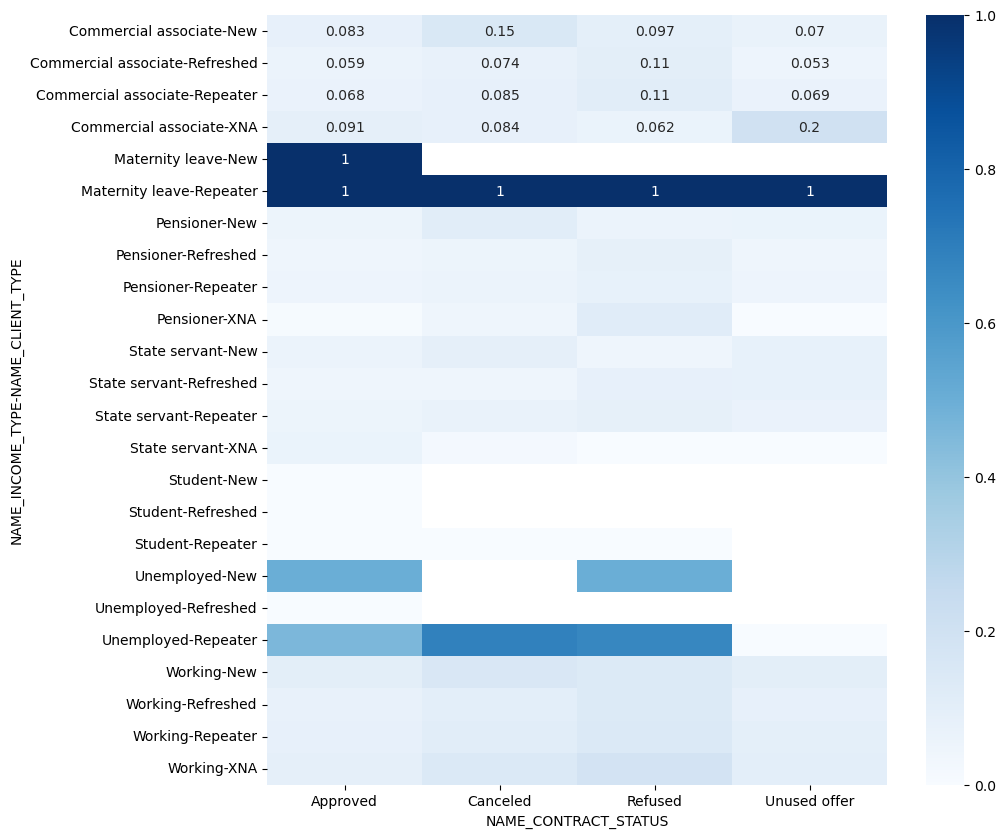

In [417]:
plt.figure(figsize=(10,10))
sns.heatmap(res1,annot=True,cmap='Blues')
plt.show()


• Conclusion >>
1. Applicants with income type Maternity leave and client type New are having more chances of getting the loan approved
2. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan cancelled
3. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan Refused
4. Applicants with income type Maternity leave and client type Repeater, Working and client type New are not able to utilizte the Bank's offer

In [418]:
res2=pd.pivot_table(data=merge_df,index=['CODE_GENDER','NAME_SELLER_INDUSTRY'],
                    columns=['TARGET'],values='AMT_GOODS_PRICE_x',aggfunc='sum')
res2

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       6.111273e+08  5.364450e+07
            Clothing              9.403640e+09  4.968903e+08
            Connectivity          7.070942e+10  5.910960e+09
            Construction          8.794223e+09  5.130180e+08
            Consumer electronics  1.086232e+11  7.170236e+09
            Furniture             1.987179e+10  1.034667e+09
            Industry              5.634099e+09  3.440790e+08
            Jewelry               6.349129e+08  4.627532e+07
            MLM partners          3.501245e+08  2.293200e+07
            Tourism               1.711690e+08  5.674500e+06
            XNA                   2.409409e+11  2.068024e+10
M           Auto technology       1.142561e+09  1.286955e+08
            Clothing              1.418759e+09  1.160505e+08
            Connectivity          4.010272e+10  4.572106e+09
            Construction          3.882024e+09  3.197192e+08
            Consumer electronics  6.305746e+10  5.757388e+09
            Furniture             5.886620e+09  4.915566e+08
            Industry              2.905955e+09  2.527595e+08
            Jewelry               2.021443e+08  2.709533e+07
            MLM partners          6.380550e+07  6.390000e+06
            Tourism               4.858650e+07  3.640500e+06
            XNA                   1.014658e+11  1.203918e+10
XNA         Connectivity          2.700000e+06           NaN
            Consumer electronics  3.262500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   2.092500e+07           NaN

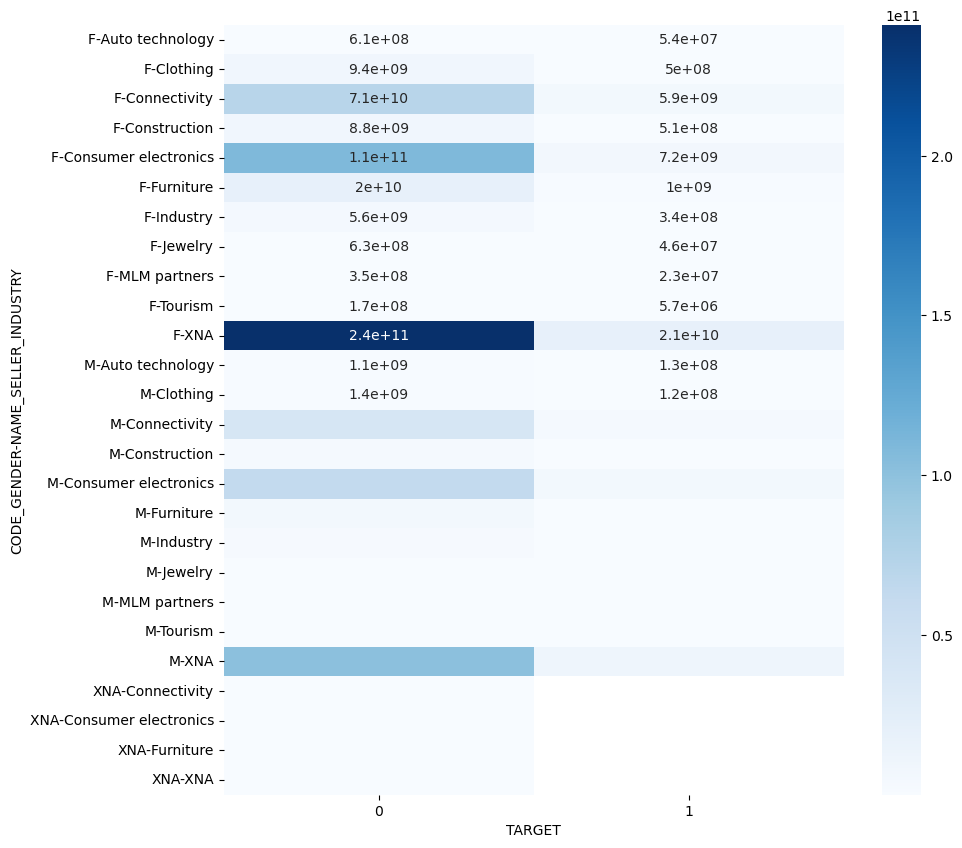

In [419]:
plt.figure(figsize=(10,10))
sns.heatmap(res2,annot=True,cmap='Blues')
plt.show()